In [1]:
%load_ext autoreload
%autoreload 2
%autosave 60

Autosaving every 60 seconds


In [62]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [61]:
# output_base_folder = Path("/Users/che/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/iarai/work/logs/storage_benchmarking")

## Stats Storage Benchmarking (benchmark_dataset)

**benchmark_dataset**

| param | range |
| --- | --- |
| pool_size | 0,1,2,3,5,7,10,15,20,30,40,50,60,80 | 
| dataset | s3,scratch |
| num_get_random_item  | 2000 |

In [4]:
group_by_dataset=["dataset", "pool_size"]

In [5]:
# first run can take much longer when using sshfs! Should we do this task offline (as we do for fio?)
df_dataset = extract_pandas(output_base_folder, folder_filter="**/*dataset*")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3561/3561 [00:08<00:00, 443.15it/s]


In [6]:
print(df_dataset.groupby(group_by_dataset).groups.keys())

dict_keys([('s3', 0), ('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80), ('scratch', 0), ('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


In [7]:
display(get_run_stats(df_dataset, group_by=group_by_dataset))

downloaded data [B]  \
dataset pool_size run                                                              
s3      0         20210908113126_benchmark_dataset_s3                  282799187   
                  20210908201608_benchmark_dataset_s3                  266024565   
                  20210912f145700_benchmark_dataset_s3                 260204630   
        1         20210908113656_benchmark_dataset_s3                  271341038   
                  20210908202135_benchmark_dataset_s3                  260431309   
...                                                                          ...   
scratch 60        20210908203847_benchmark_dataset_scratch             214392240   
                  20210912f152348_benchmark_dataset_scratch            214392240   
        80        20210908115457_benchmark_dataset_scratch             217111520   
                  20210908203912_benchmark_dataset_scratch             217111520   
                  20210912f152413_benchmark_dataset_scratch            217111520   

                                                               time_start  \
dataset pool_size run                                                       
s3      0         20210908113126_benchmark_dataset_s3        1.631093e+09   
                  20210908201608_benchmark_dataset_s3        1.631125e+09   
                  20210912f145700_benchmark_dataset_s3       1.631451e+09   
        1         20210908113656_benchmark_dataset_s3        1.631094e+09   
                  20210908202135_benchmark_dataset_s3        1.631125e+09   
...                                                                   ...   
scratch 60        20210908203847_benchmark_dataset_scratch   1.631126e+09   
                  20210912f152348_benchmark_dataset_scratch  1.631453e+09   
        80        20210908115457_benchmark_dataset_scratch   1.631095e+09   
                  20210908203912_benchmark_dataset_scratch   1.631126e+09   
                  20210912f152413_benchmark_dataset_scratch  1.631453e+09   

                                                                 time_end  \
dataset pool_size run                                                       
s3      0         20210908113126_benchmark_dataset_s3        1.631094e+09   
                  20210908201608_benchmark_dataset_s3        1.631125e+09   
                  20210912f145700_benchmark_dataset_s3       1.631452e+09   
        1         20210908113656_benchmark_dataset_s3        1.631094e+09   
                  20210908202135_benchmark_dataset_s3        1.631126e+09   
...                                                                   ...   
scratch 60        20210908203847_benchmark_dataset_scratch   1.631126e+09   
                  20210912f152348_benchmark_dataset_scratch  1.631453e+09   
        80        20210908115457_benchmark_dataset_scratch   1.631095e+09   
                  20210908203912_benchmark_dataset_scratch   1.631126e+09   
                  20210912f152413_benchmark_dataset_scratch  1.631453e+09   

                                                             total_elpased_time [s]  \
dataset pool_size run                                                                 
s3      0         20210908113126_benchmark_dataset_s3                    329.597332   
                  20210908201608_benchmark_dataset_s3                    326.116116   
                  20210912f145700_benchmark_dataset_s3                   308.444045   
        1         20210908113656_benchmark_dataset_s3                    330.536952   
                  20210908202135_benchmark_dataset_s3                    321.079744   
...                                                                             ...   
scratch 60        20210908203847_benchmark_dataset_scratch                16.994171   
                  20210912f152348_benchmark_dataset_scratch               16.813240   
        80        20210908115457_benchmark_dataset_scratch                18.118163   
       

In [57]:
display(get_thread_stats(df_dataset))

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139621606807360       1.631095e+09     1.631095e+09             12.212486   
139621621819200       1.631095e+09     1.631095e+09             15.812370   
139622833157952       1.631453e+09     1.631453e+09             14.612409   
139622990640960       1.631126e+09     1.631126e+09             14.282944   
139623955334976       1.631453e+09     1.631453e+09             13.143140   
...                            ...              ...                   ...   
140718542194496       1.631126e+09     1.631126e+09             14.810606   
140718646290240       1.631453e+09     1.631453e+09              9.064597   
140718812804928       1.631095e+09     1.631095e+09              8.052062   
140719347320640       1.631095e+09     1.631095e+09             10.041211   
140720185808704       1.631095e+09     1.631095e+09             16.466486   

                 elapsed_thread  elapsed_processing  
threading_ident                                      
139621606807360       12.286788            0.993953  
139621621819200       15.826260            0.999122  
139622833157952       14.621345            0.999389  
139622990640960       14.294077            0.999221  
139623955334976       13.153291            0.999228  
...                         ...                 ...  
140718542194496       14.818058            0.999497  
140718646290240        9.115987            0.994363  
140718812804928        8.061871            0.998783  
140719347320640       10.049726            0.999153  
140720185808704       16.490719            0.998531  

[1951 rows x 5 columns]

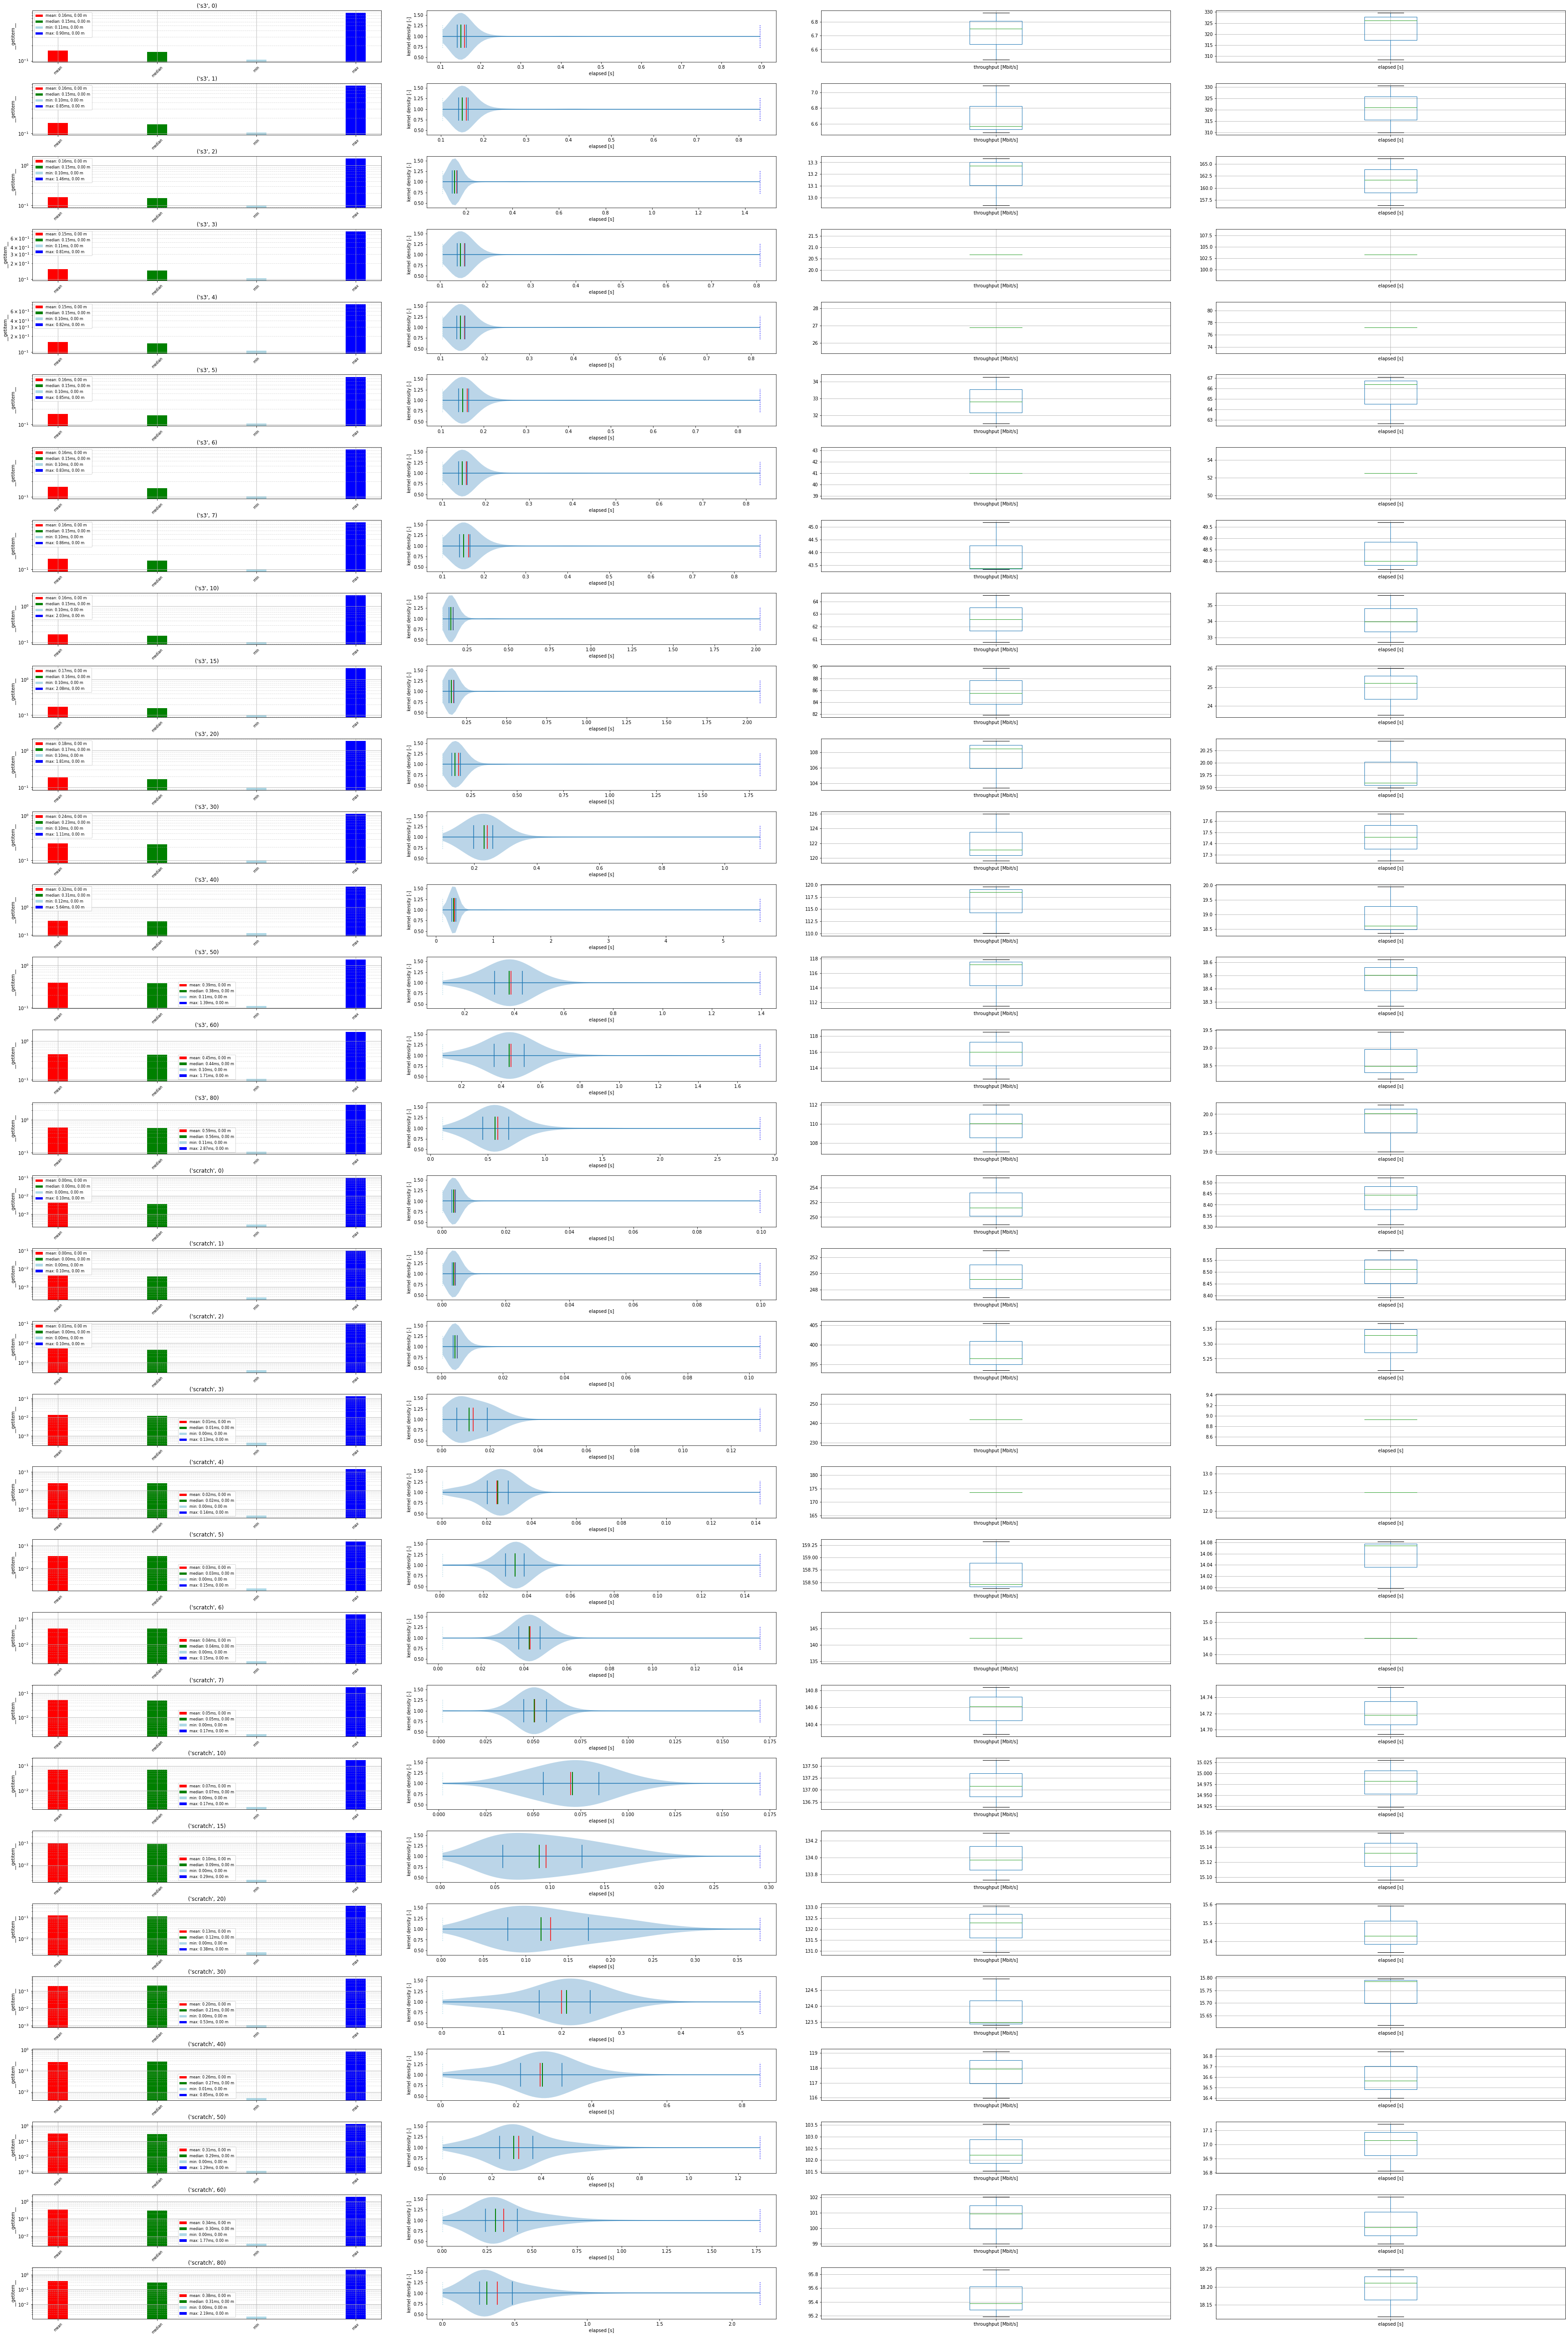

In [8]:
plot_all(df_dataset, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataset)

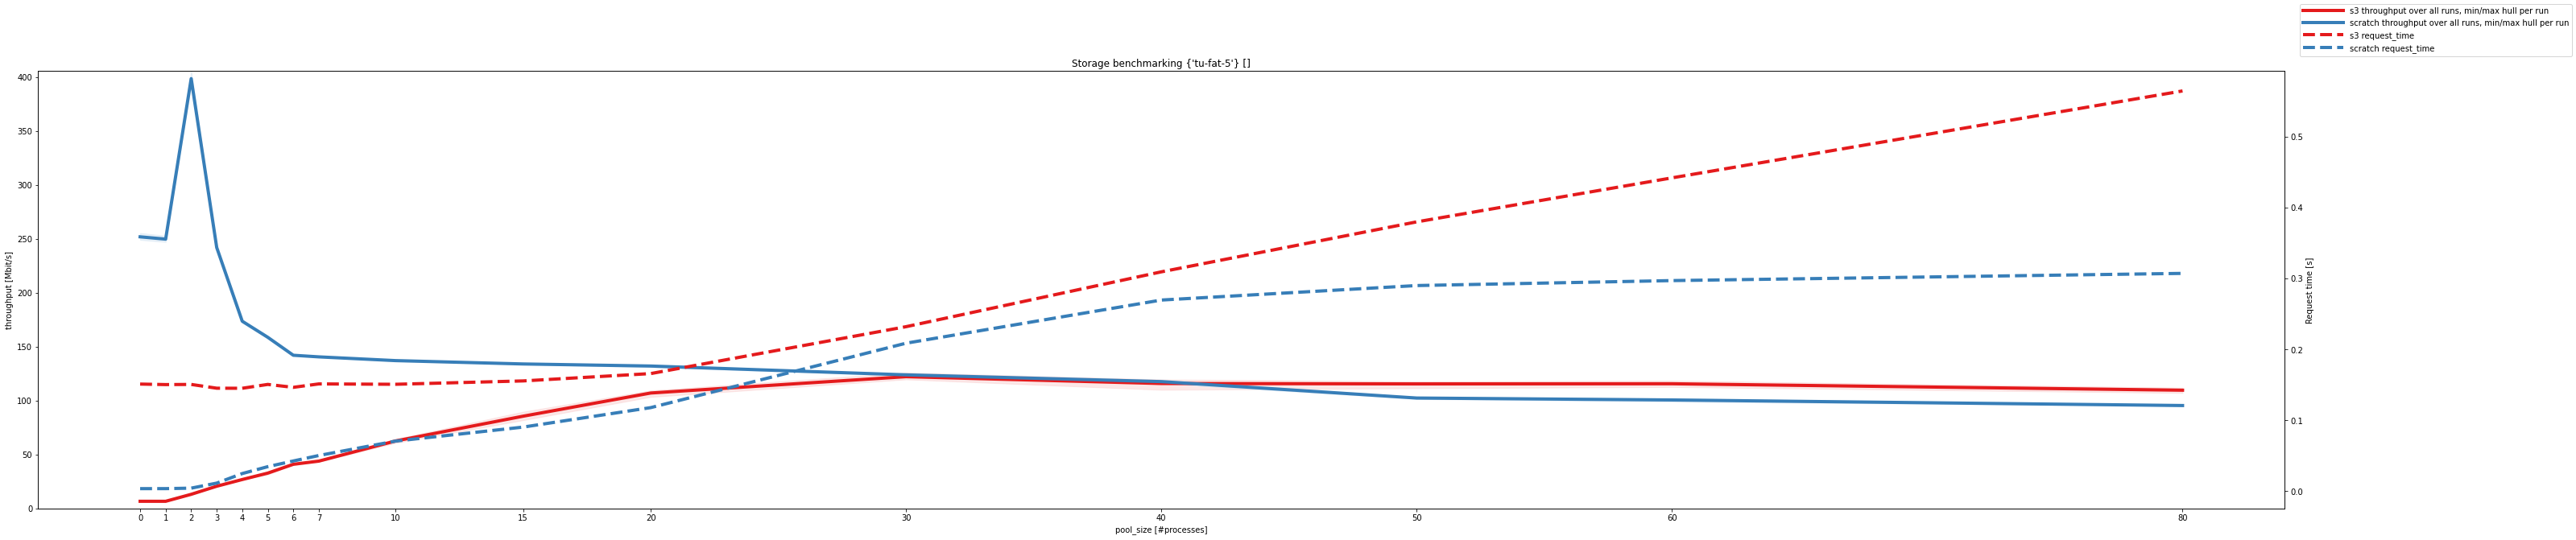

In [9]:
plot_throughput_per_storage(df_dataset, group_by_dataset)

What is strange in the above plot: the median request time does not goup for scratch when throughput stays the same? As for s3, it should double between 40 and 80.
We should plot and sum the idle times within each process! Is this python process pool again that causes problems starting the next time in the map?

### Timeline of request times of a single run

In [12]:
# experiment = "20210908115319_benchmark_dataset_scratch"
experiment = "20210908203409_benchmark_dataset_s3"
output_base_folder_timeline_dataset = output_base_folder / experiment

In [14]:
with (output_base_folder_timeline_dataset / "metadata.json").open() as f:
    metadata = json.load(f)
print(metadata)

{'output_base_folder': 'benchmark_output', 'dataset': 's3', 'num_get_random_item': 2000, 'num_load_index': 0, 'num_index_all': 0, 'pool_size': 50, 'args': None, 'loglevel': 'INFO', 'system': 'Linux', 'node': 'tu-fat-5', 'release': '4.19.0-17-amd64', 'version': '#1 SMP Debian 4.19.194-1 (2021-06-10)', 'machine': 'x86_64'}


In [15]:
df = df_dataset[df_dataset["run"]==experiment]
df = df[df["function_name"]=="__getitem__"]
display(df.head())
# assert len(df) == metadata["num_get_random_item"], (len(df),metadata["num_get_random_item"])

trace_name  trace_level function_name   elapsed    time_start  \
0  (5)-get_item            5   __getitem__  0.823937  1.631126e+09   
1  (5)-get_item            5   __getitem__  0.432453  1.631126e+09   
2  (5)-get_item            5   __getitem__  0.435903  1.631126e+09   
3  (5)-get_item            5   __getitem__  0.515125  1.631126e+09   
4  (5)-get_item            5   __getitem__  0.388513  1.631126e+09   

       time_end  process_time  process_time_start  process_time_end    pid  \
0  1.631126e+09      0.590403            5.983855          6.574258  22679   
1  1.631126e+09      0.691701            6.576550          7.268251  22679   
2  1.631126e+09      0.476170            7.269081          7.745251  22679   
3  1.631126e+09      0.634037            7.745475          8.379512  22679   
4  1.631126e+09      0.581511            8.391521          8.973032  22679   

   ...  pool_size  args loglevel system      node          release  \
0  ...         50  None     INFO  Linux  tu-fat-5  4.19.0-17-amd64   
1  ...         50  None     INFO  Linux  tu-fat-5  4.19.0-17-amd64   
2  ...         50  None     INFO  Linux  tu-fat-5  4.19.0-17-amd64   
3  ...         50  None     INFO  Linux  tu-fat-5  4.19.0-17-amd64   
4  ...         50  None     INFO  Linux  tu-fat-5  4.19.0-17-amd64   

                                 version  machine  \
0  #1 SMP Debian 4.19.194-1 (2021-06-10)   x86_64   
1  #1 SMP Debian 4.19.194-1 (2021-06-10)   x86_64   
2  #1 SMP Debian 4.19.194-1 (2021-06-10)   x86_64   
3  #1 SMP Debian 4.19.194-1 (2021-06-10)   x86_64   
4  #1 SMP Debian 4.19.194-1 (2021-06-10)   x86_64   

                                         source_file  \
0  /Users/che/iarai/work/logs/storage_benchmarkin...   
1  /Users/che/iarai/work/logs/storage_benchmarkin...   
2  /Users/che/iarai/work/logs/storage_benchmarkin...   
3  /Users/che/iarai/work/logs/storage_benchmarkin...   
4  /Users/che/iarai/work/logs/storage_benchmarkin...   

                                   run  
0  20210908203409_benchmark_dataset_s3  
1  20210908203409_benchmark_dataset_s3  
2  20210908203409_benchmark_dataset_s3  
3  20210908203409_benchmark_dataset_s3  
4  20210908203409_benchmark_dataset_s3  

[5 rows x 27 columns]

In the following plot we see that, time and time again, there are requests taking much longer than the median. So we must be prepared for those. 
* scratch: Not sure what happens at the beginning and the end (concavity), whether this happens in all experiments. 
* s3: the first item always takes much longer (is this at the thread pool or network request level?
We should find an explanation for those phenomena.

<AxesSubplot:xlabel='time_end', ylabel='elapsed'>

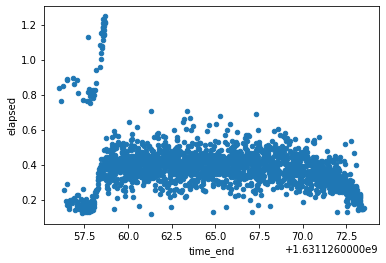

In [16]:
df.plot.scatter(x="time_end", y="elapsed")

In the following plot, we see that after a warmup phase, throughput is constant with some white noise. If we run experiments long enough, we should not need to filter out the warmup phase, it should be averaged out and not distort the overall throughput.

Text(0.5, 0.98, 'throughput [#/ds]')

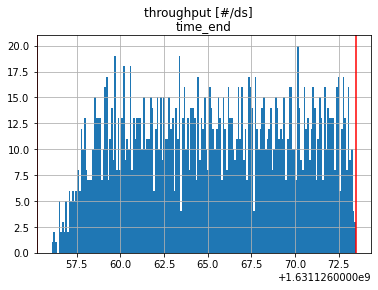

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1)
df.hist(column="time_end", bins=int(df["time_end"].max()-df["time_start"].min())*10, ax=axes)
axes.axvline(df["time_start"].min(), color="red")
axes.axvline(df["time_end"].max(), color="red")
fig.suptitle("throughput [#/ds]")

Text(0.5, 0.98, 'throughput [#/ds]')

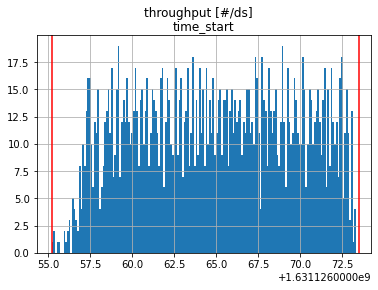

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1)
df.hist(column="time_start", bins=int(df["time_end"].max()-df["time_start"].min())*10, ax=axes)
axes.axvline(df["time_start"].min(), color="red")
axes.axvline(df["time_end"].max(), color="red")
fig.suptitle("throughput [#/ds]")

## Benchmarking asyncio implementation only (no workers)

**benchmark_dataloader**

| param | range |
| --- | --- |
| num_workers | 0 |
|num_fetch_workers | 1,2,4,6,8,..,128 | 
| dataset | s3,scratch |
| num_batches | 40 |
| batch_size | 128 |


In [19]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers"]

In [20]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="**/*dataloader*")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 394/394 [00:03<00:00, 104.77it/s]


In [21]:
df_dataloader_zeroworkers=df_dataloader[df_dataloader["num_workers"]==0]

In [22]:
print(df_dataloader_zeroworkers.groupby(group_by_dataloader).groups.keys())

dict_keys([('s3', 1, 0), ('s3', 2, 0), ('s3', 4, 0), ('s3', 8, 0), ('s3', 16, 0), ('s3', 32, 0), ('s3', 64, 0), ('s3', 128, 0), ('scratch', 1, 0), ('scratch', 2, 0), ('scratch', 4, 0), ('scratch', 8, 0), ('scratch', 16, 0), ('scratch', 32, 0), ('scratch', 64, 0), ('scratch', 128, 0)])


In [23]:
display(get_run_stats(df_dataloader_zeroworkers, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers run                                                                       
s3      1                 0           20210907195602_benchmark_dataloader_128_0_sync              674608854.0   
                                      20210908105511_benchmark_dataloader_s3_128_0_1_...          700122958.0   
                                      20210908194123_benchmark_dataloader_s3_128_0_1_...          695070183.0   
                                      20210912f142335_benchmark_dataloader_s3_128_0_1...          685259134.0   
        2                 0           20210907201017_benchmark_dataloader_128_0_sync              683393958.0   
...                                                                                                       ...   
scratch 64                0           20210912f145628_benchmark_dataloader_scratch_12...          678908611.0   
        128               0           20210907202853_benchmark_dataloader_128_0_sync                      0.0   
                                      20210908113108_benchmark_dataloader_scratch_128...          682608530.0   
                                      20210908201550_benchmark_dataloader_scratch_128...          685732946.0   
                                      20210912f145641_benchmark_dataloader_scratch_12...          689723499.0   

                                                                                            time_start  \
dataset num_fetch_workers num_workers run                                                                
s3      1                 0           20210907195602_benchmark_dataloader_128_0_sync      1.631037e+09   
                                      20210908105511_benchmark_dataloader_s3_128_0_1_...  1.631091e+09   
                                      20210908194123_benchmark_dataloader_s3_128_0_1_...  1.631123e+09   
                                      20210912f142335_benchmark_dataloader_s3_128_0_1...  1.631449e+09   
        2                 0           20210907201017_benchmark_dataloader_128_0_sync      1.631038e+09   
...                                                                                                ...   
scratch 64                0           20210912f145628_benchmark_dataloader_scratch_12...  1.631451e+09   
        128               0           20210907202853_benchmark_dataloader_128_0_sync      1.631039e+09   
                                      20210908113108_benchmark_dataloader_scratch_128...  1.631093e+09   
                                      20210908201550_benchmark_dataloader_scratch_128...  1.631125e+09   
                                      20210912f145641_benchmark_dataloader_scratch_12...  1.631451e+09   

                                                                                              time_end  \
dataset num_fetch_workers num_workers run                                                                
s3      1                 0           20210907195602_benchmark_dataloader_128_0_sync      1.631038e+09   
                                      20210908105511_benchmark_dataloader_s3_128_0_1_...  1.631092e+09   
                                      20210908194123_benchmark_dataloader_s3_128_0_1_...  1.631124e+09   
                                      20210912f142335_benchmark_dataloader_s3_128_0_1...  1.631450e+09   
        2                 0           20210907201017_benchmark_dataloader_128_0_sync      1.631039e+09   
...                                                                                                ...   
scratch 64                0           20210912f145628_benchmark_dataloader_scratch_12...  1.631451e+09   
        128               0           20210907202853_benchmark_dataloader_128_0_sync      1.631039e+09   
                                      20210908113108_benchmark_dataloader_scratch_128...  1.631093e+09   
                                      20210908201550_benchmark_dataloader_s

In [60]:
display(get_thread_stats(df_dataloader_zeroworkers,group_by=group_by_dataloader))

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
1.396178e+14          1.631093e+09     1.631093e+09             24.484246   
1.396206e+14          1.631125e+09     1.631125e+09             69.355879   
1.396207e+14          1.631125e+09     1.631125e+09             69.430238   
1.396207e+14          1.631125e+09     1.631125e+09             69.123163   
1.396207e+14          1.631125e+09     1.631125e+09             69.542511   
...                            ...              ...                   ...   
1.406826e+14          1.631125e+09     1.631125e+09             53.365468   
1.406826e+14          1.631125e+09     1.631125e+09             51.255265   
1.406826e+14          1.631125e+09     1.631125e+09             52.080723   
1.406826e+14          1.631125e+09     1.631125e+09             47.087895   
1.406827e+14          1.631125e+09     1.631125e+09             49.507305   

                 dataset  num_fetch_workers  num_workers  elapsed_thread  \
threading_ident                                                            
1.396178e+14     scratch                  1            0       26.147657   
1.396206e+14          s3                 16            0       78.060495   
1.396207e+14          s3                 16            0       78.133324   
1.396207e+14          s3                 16            0       78.098538   
1.396207e+14          s3                 16            0       78.034816   
...                  ...                ...          ...             ...   
1.406826e+14          s3                128            0       96.811354   
1.406826e+14          s3                128            0       97.492729   
1.406826e+14          s3                128            0       97.543641   
1.406826e+14          s3                128            0       97.224568   
1.406827e+14          s3                128            0       98.136390   

                 elapsed_processing  
threading_ident                      
1.396178e+14               0.936384  
1.396206e+14               0.888489  
1.396207e+14               0.888612  
1.396207e+14               0.885076  
1.396207e+14               0.891173  
...                             ...  
1.406826e+14               0.551232  
1.406826e+14               0.525734  
1.406826e+14               0.533922  
1.406826e+14               0.484321  
1.406827e+14               0.504474  

[1530 rows x 8 columns]

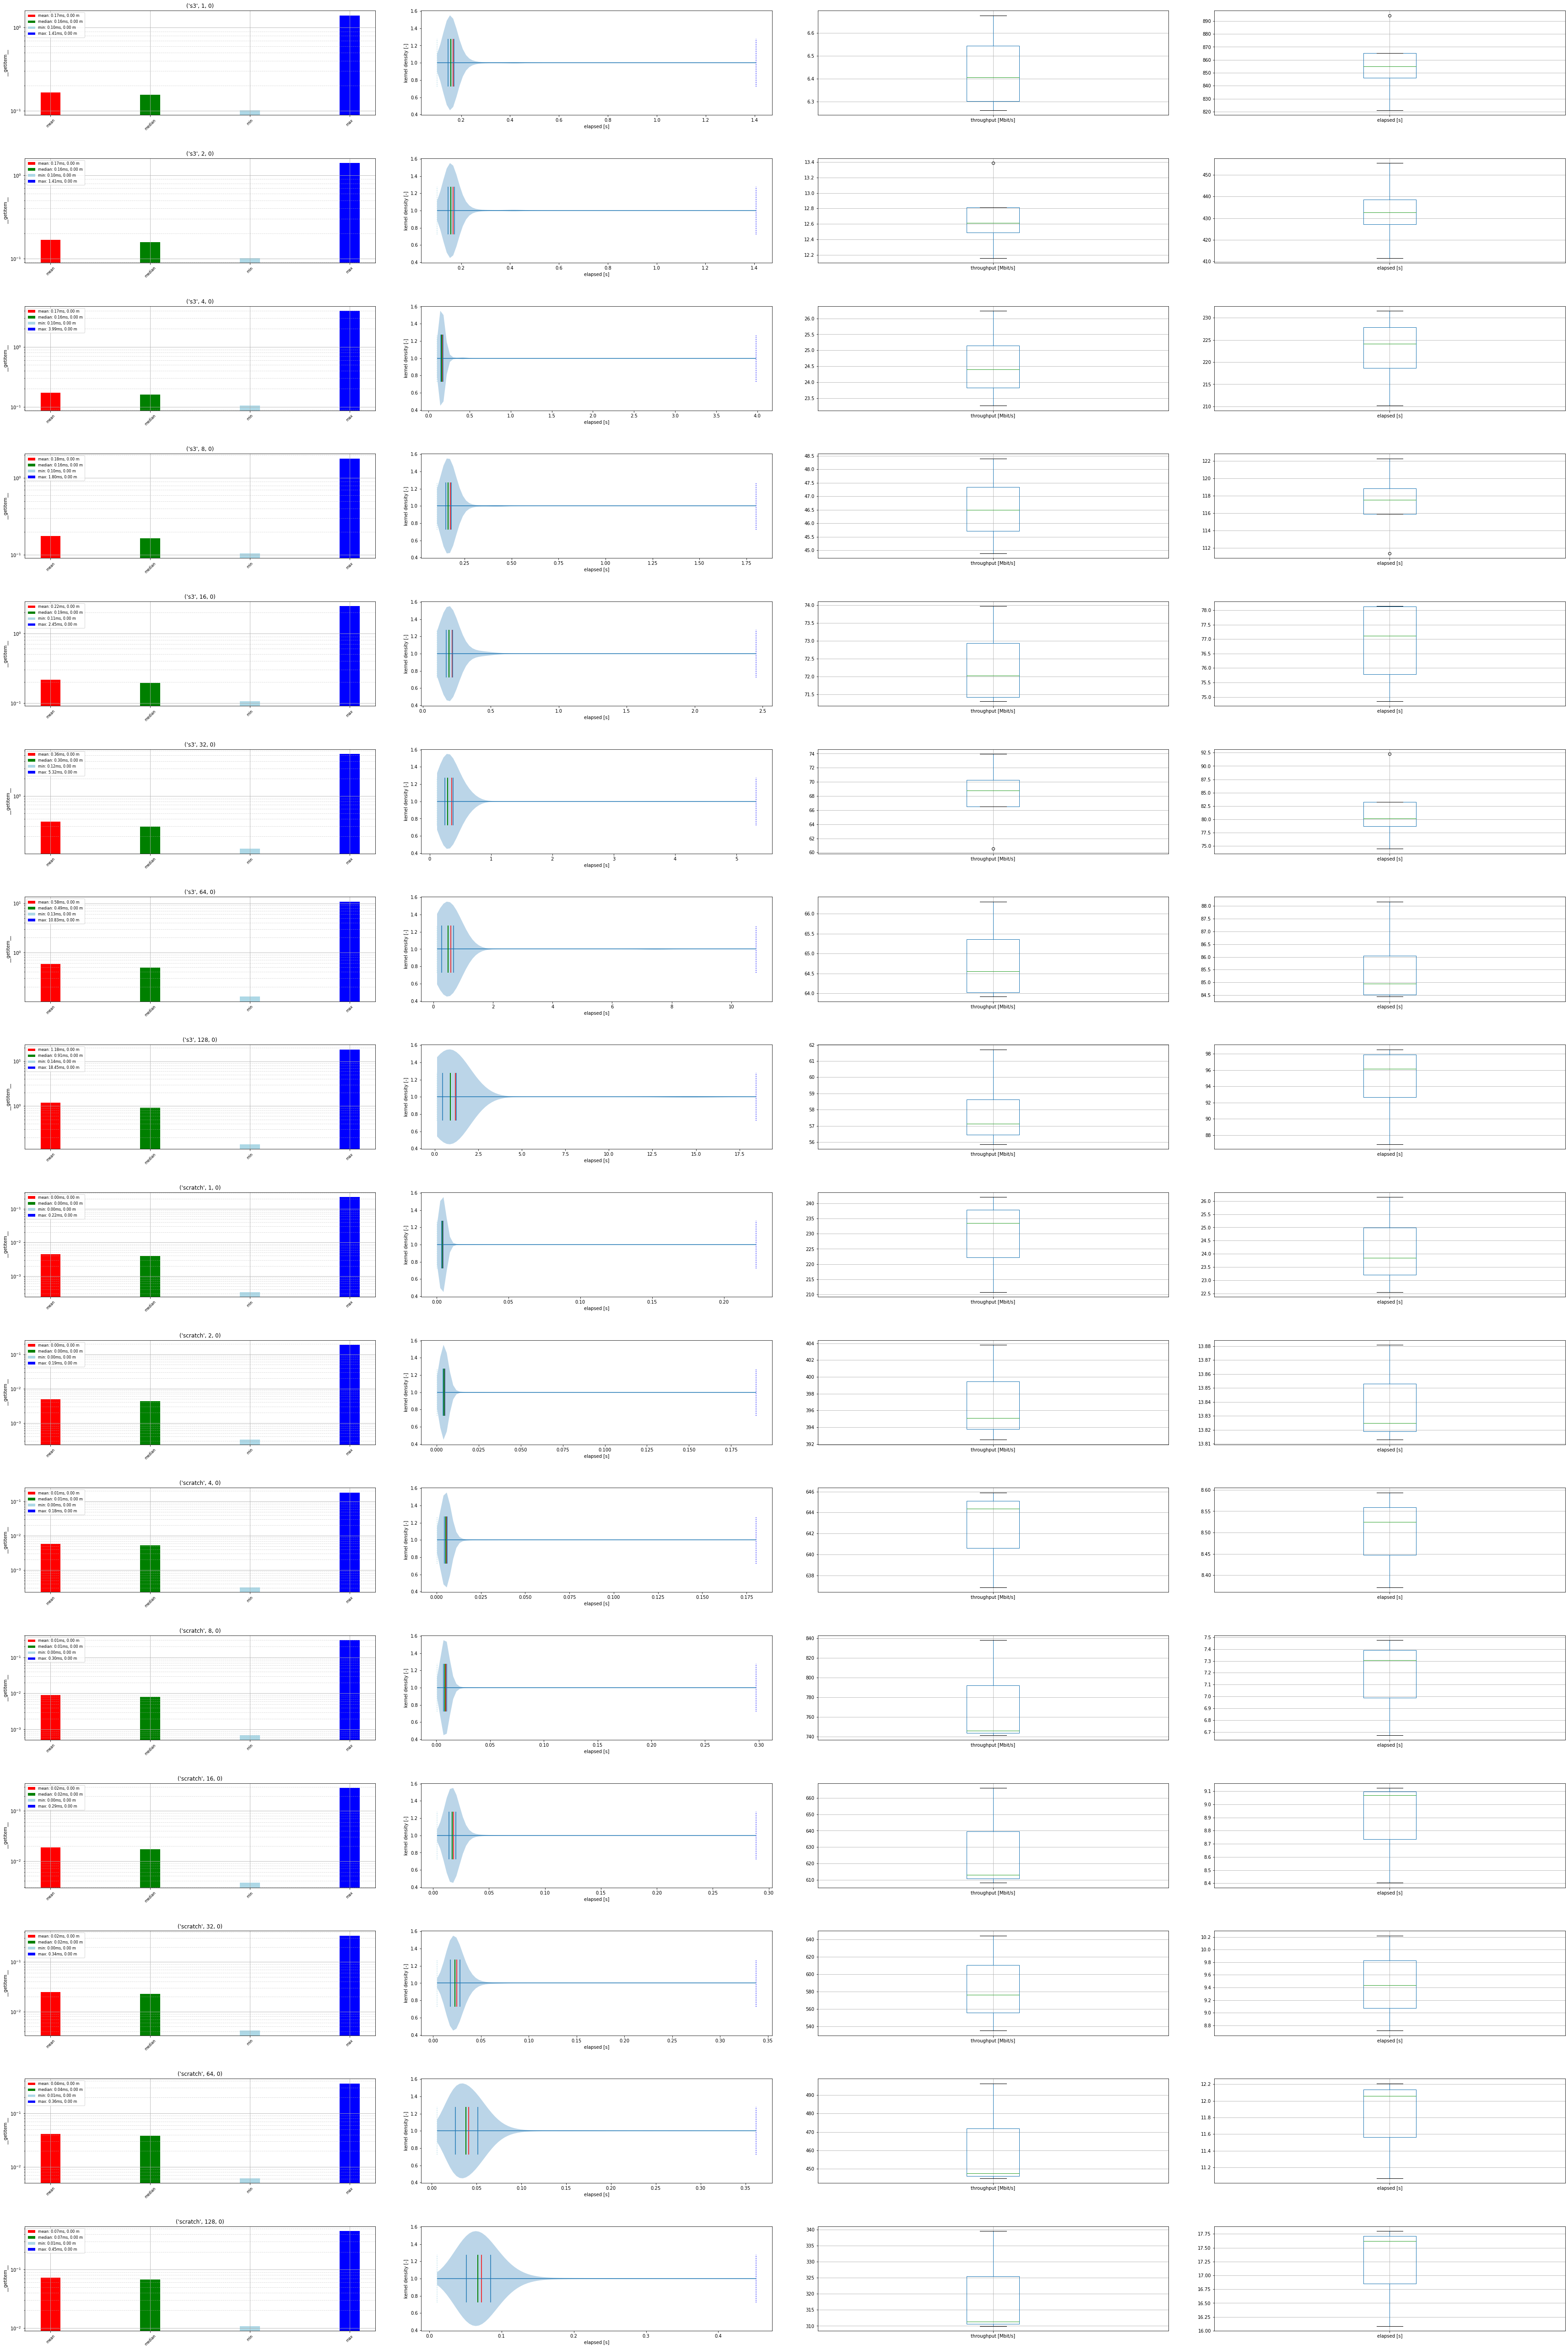

In [24]:
plot_all(df_dataloader_zeroworkers, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataloader)

/Users/che/workspaces/storage-benchmarking/src/analysis/analyze_results.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_function_name["request_time"] = df_for_function_name["time_end"] - df_for_function_name["time_start"]


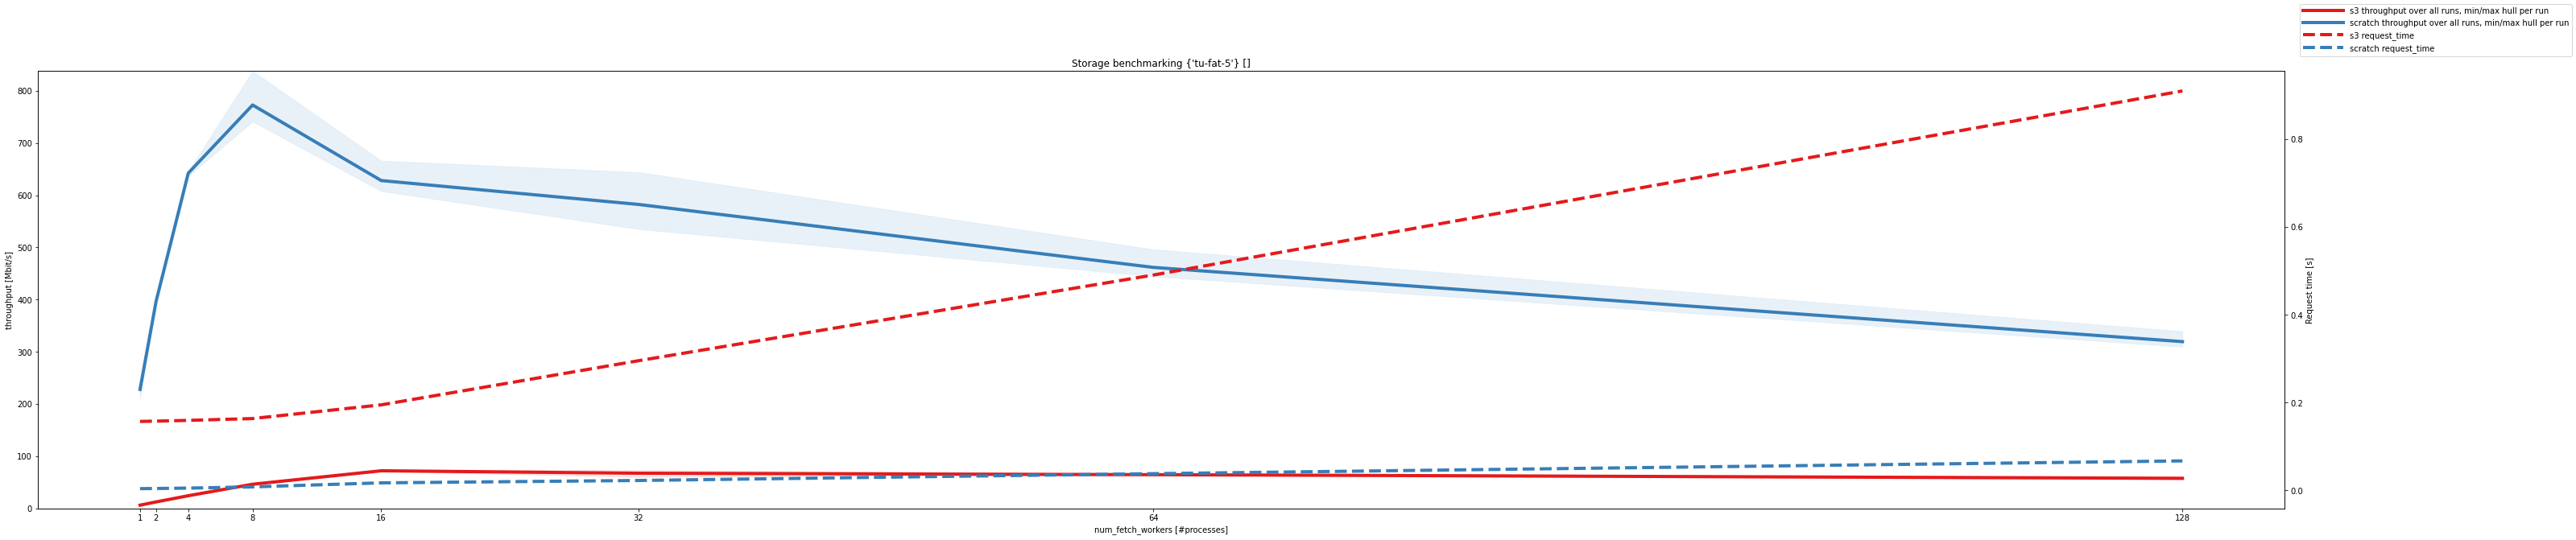

In [25]:
plot_throughput_per_storage(df_dataloader_zeroworkers, group_by_dataloader)

In [26]:
# TODO: The throughput with dataloader seems to smaller than with pure multiprocessing  -> visualize the time spent waiting for the last item to come in per batch

### Event plots of dataloading

Let's visualize the timeline of dataloading, a new color for each thread (cycle 8)

In [27]:
df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==1]["run"].iloc[0]

'20210912f145511_benchmark_dataloader_scratch_128_0_1_sync'

The horizontal line at the top is the extend of trace_levels 1/2 (benchmark_dataloader/load_all). Then, below for each batch a step for each batch. With num_workers=0, batches are fetched fully sequentially. We see that the unique thread we see the same fetcher thread is re-used for all data, and data is fetched sequentially within the batch.

total_elapsed=0:00:22.583157
total_bytes=682.6 MB
overall rate 30.2 MB/s
overall rate 241.8 MBit/s


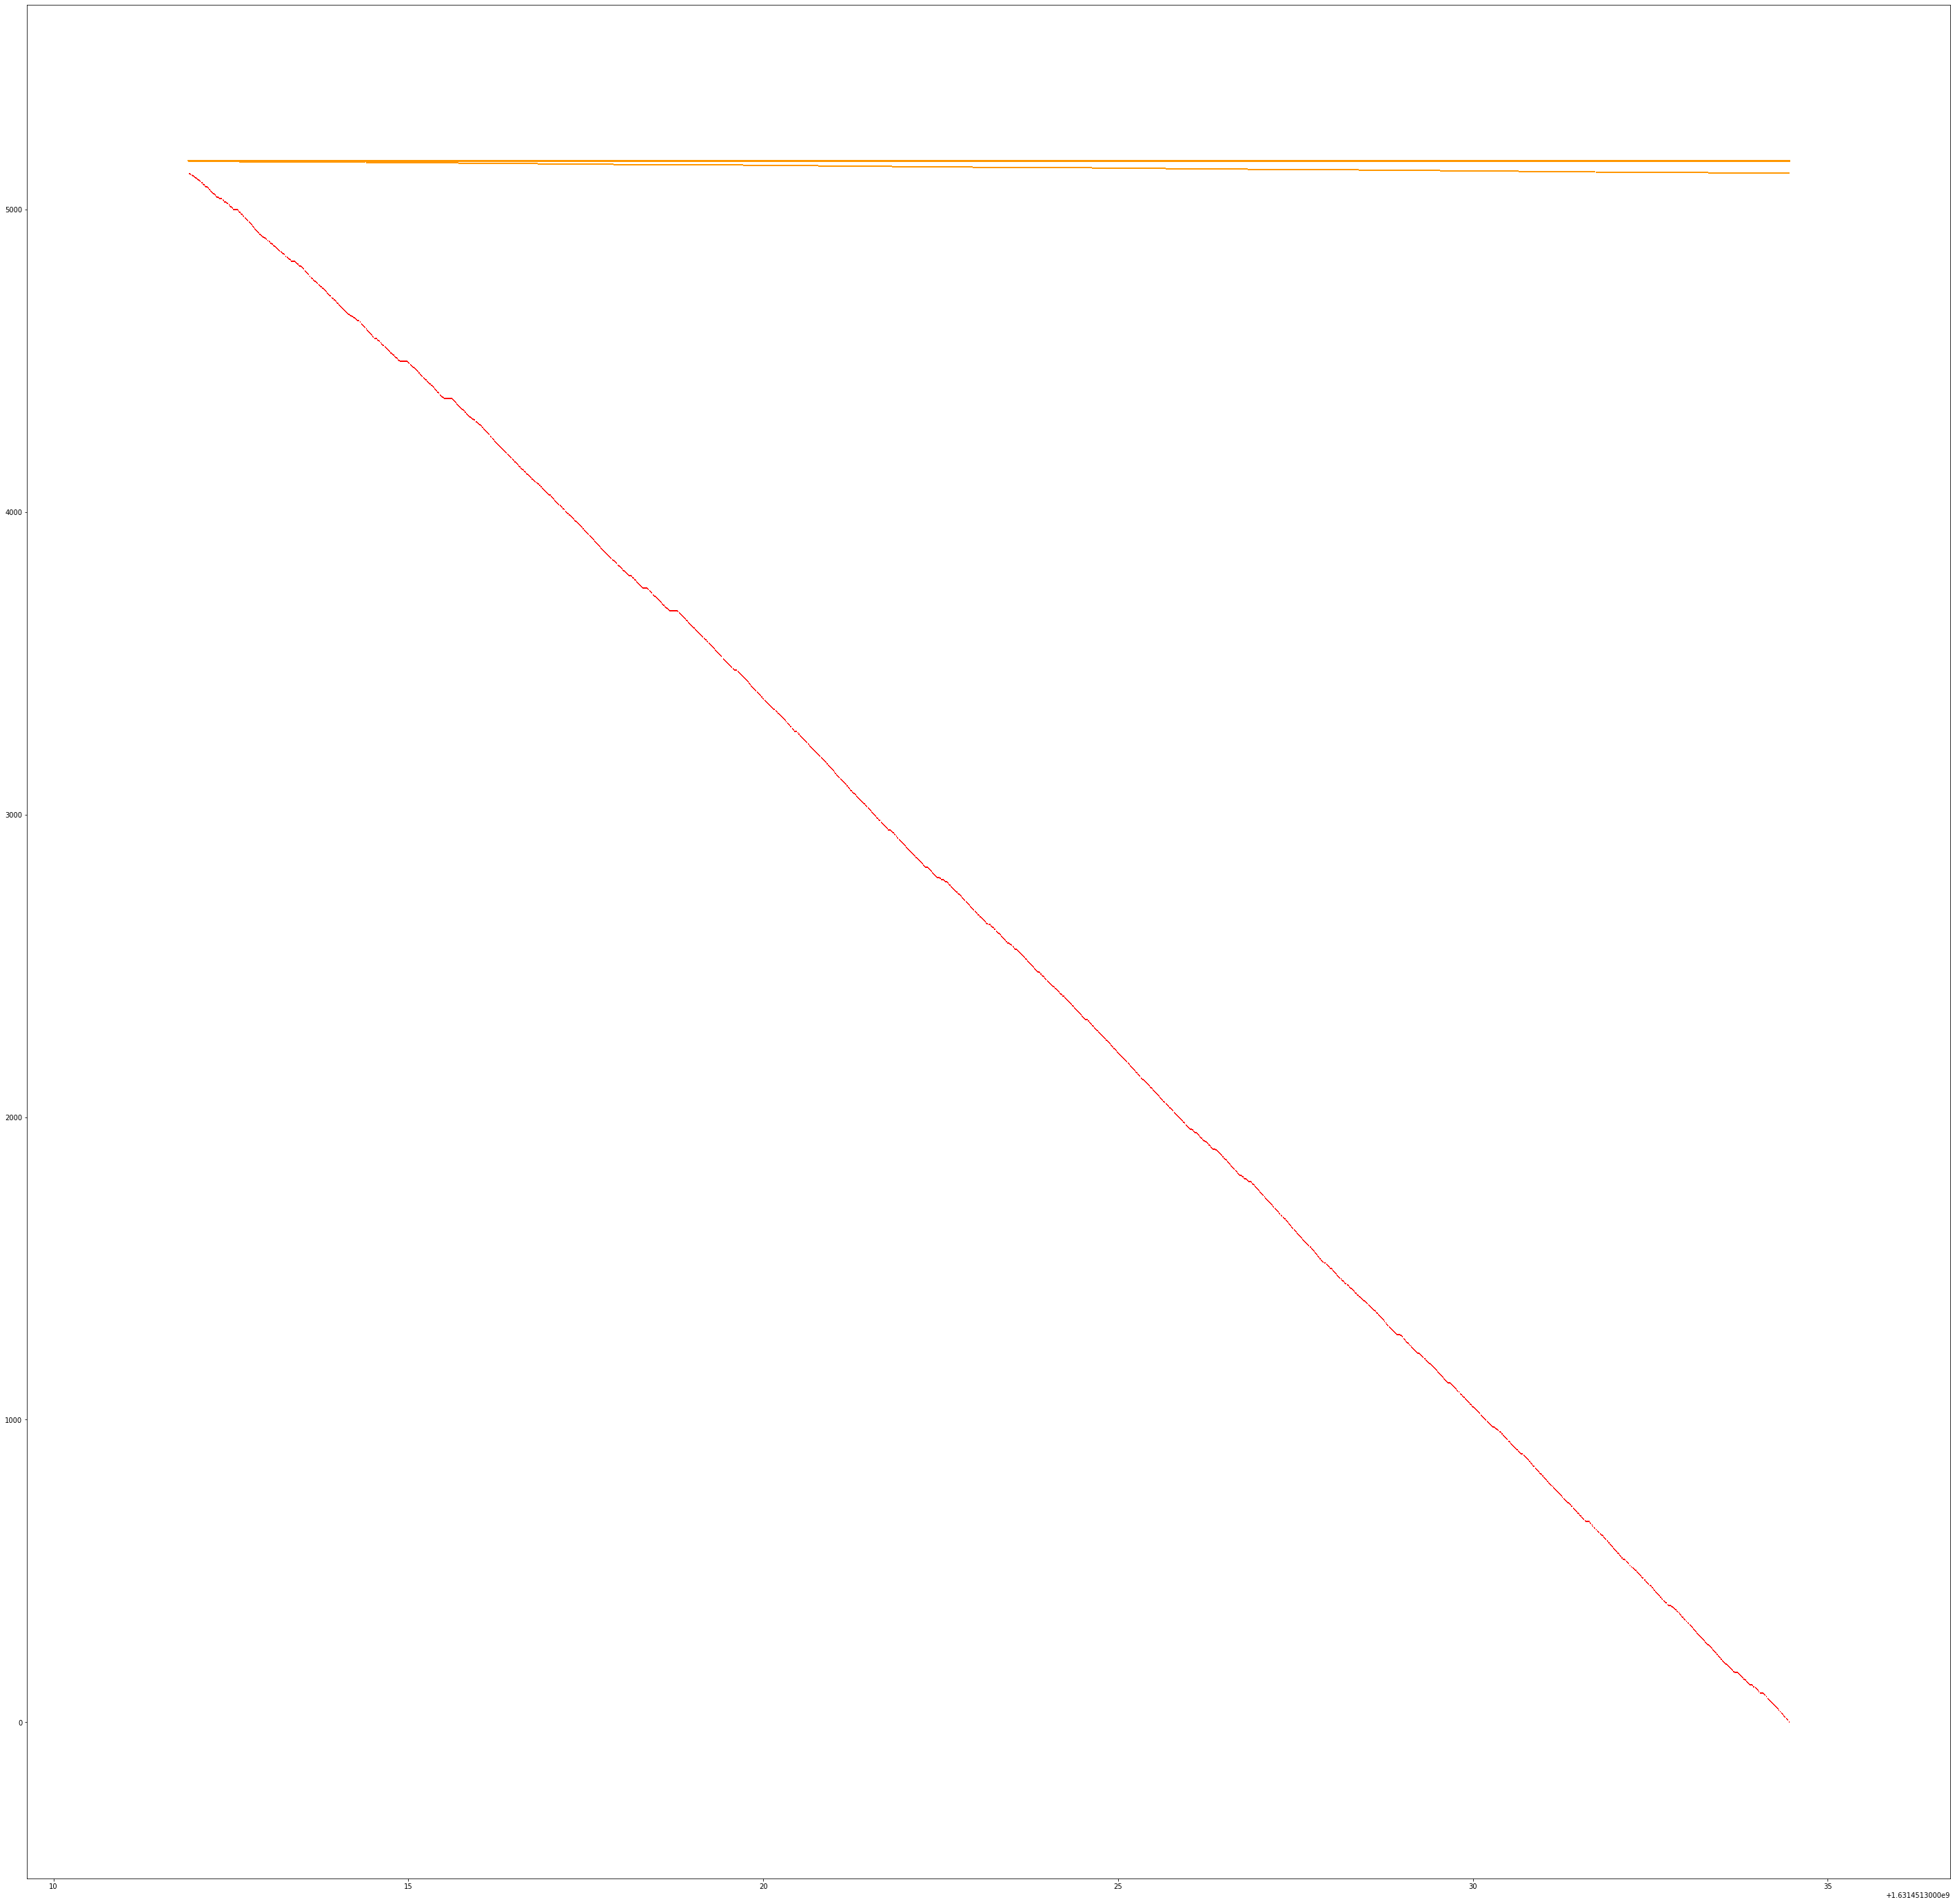

In [28]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==1]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

total_elapsed=0:07:12.360070
total_bytes=680.8 MB
overall rate 1.6 MB/s
overall rate 12.6 MBit/s


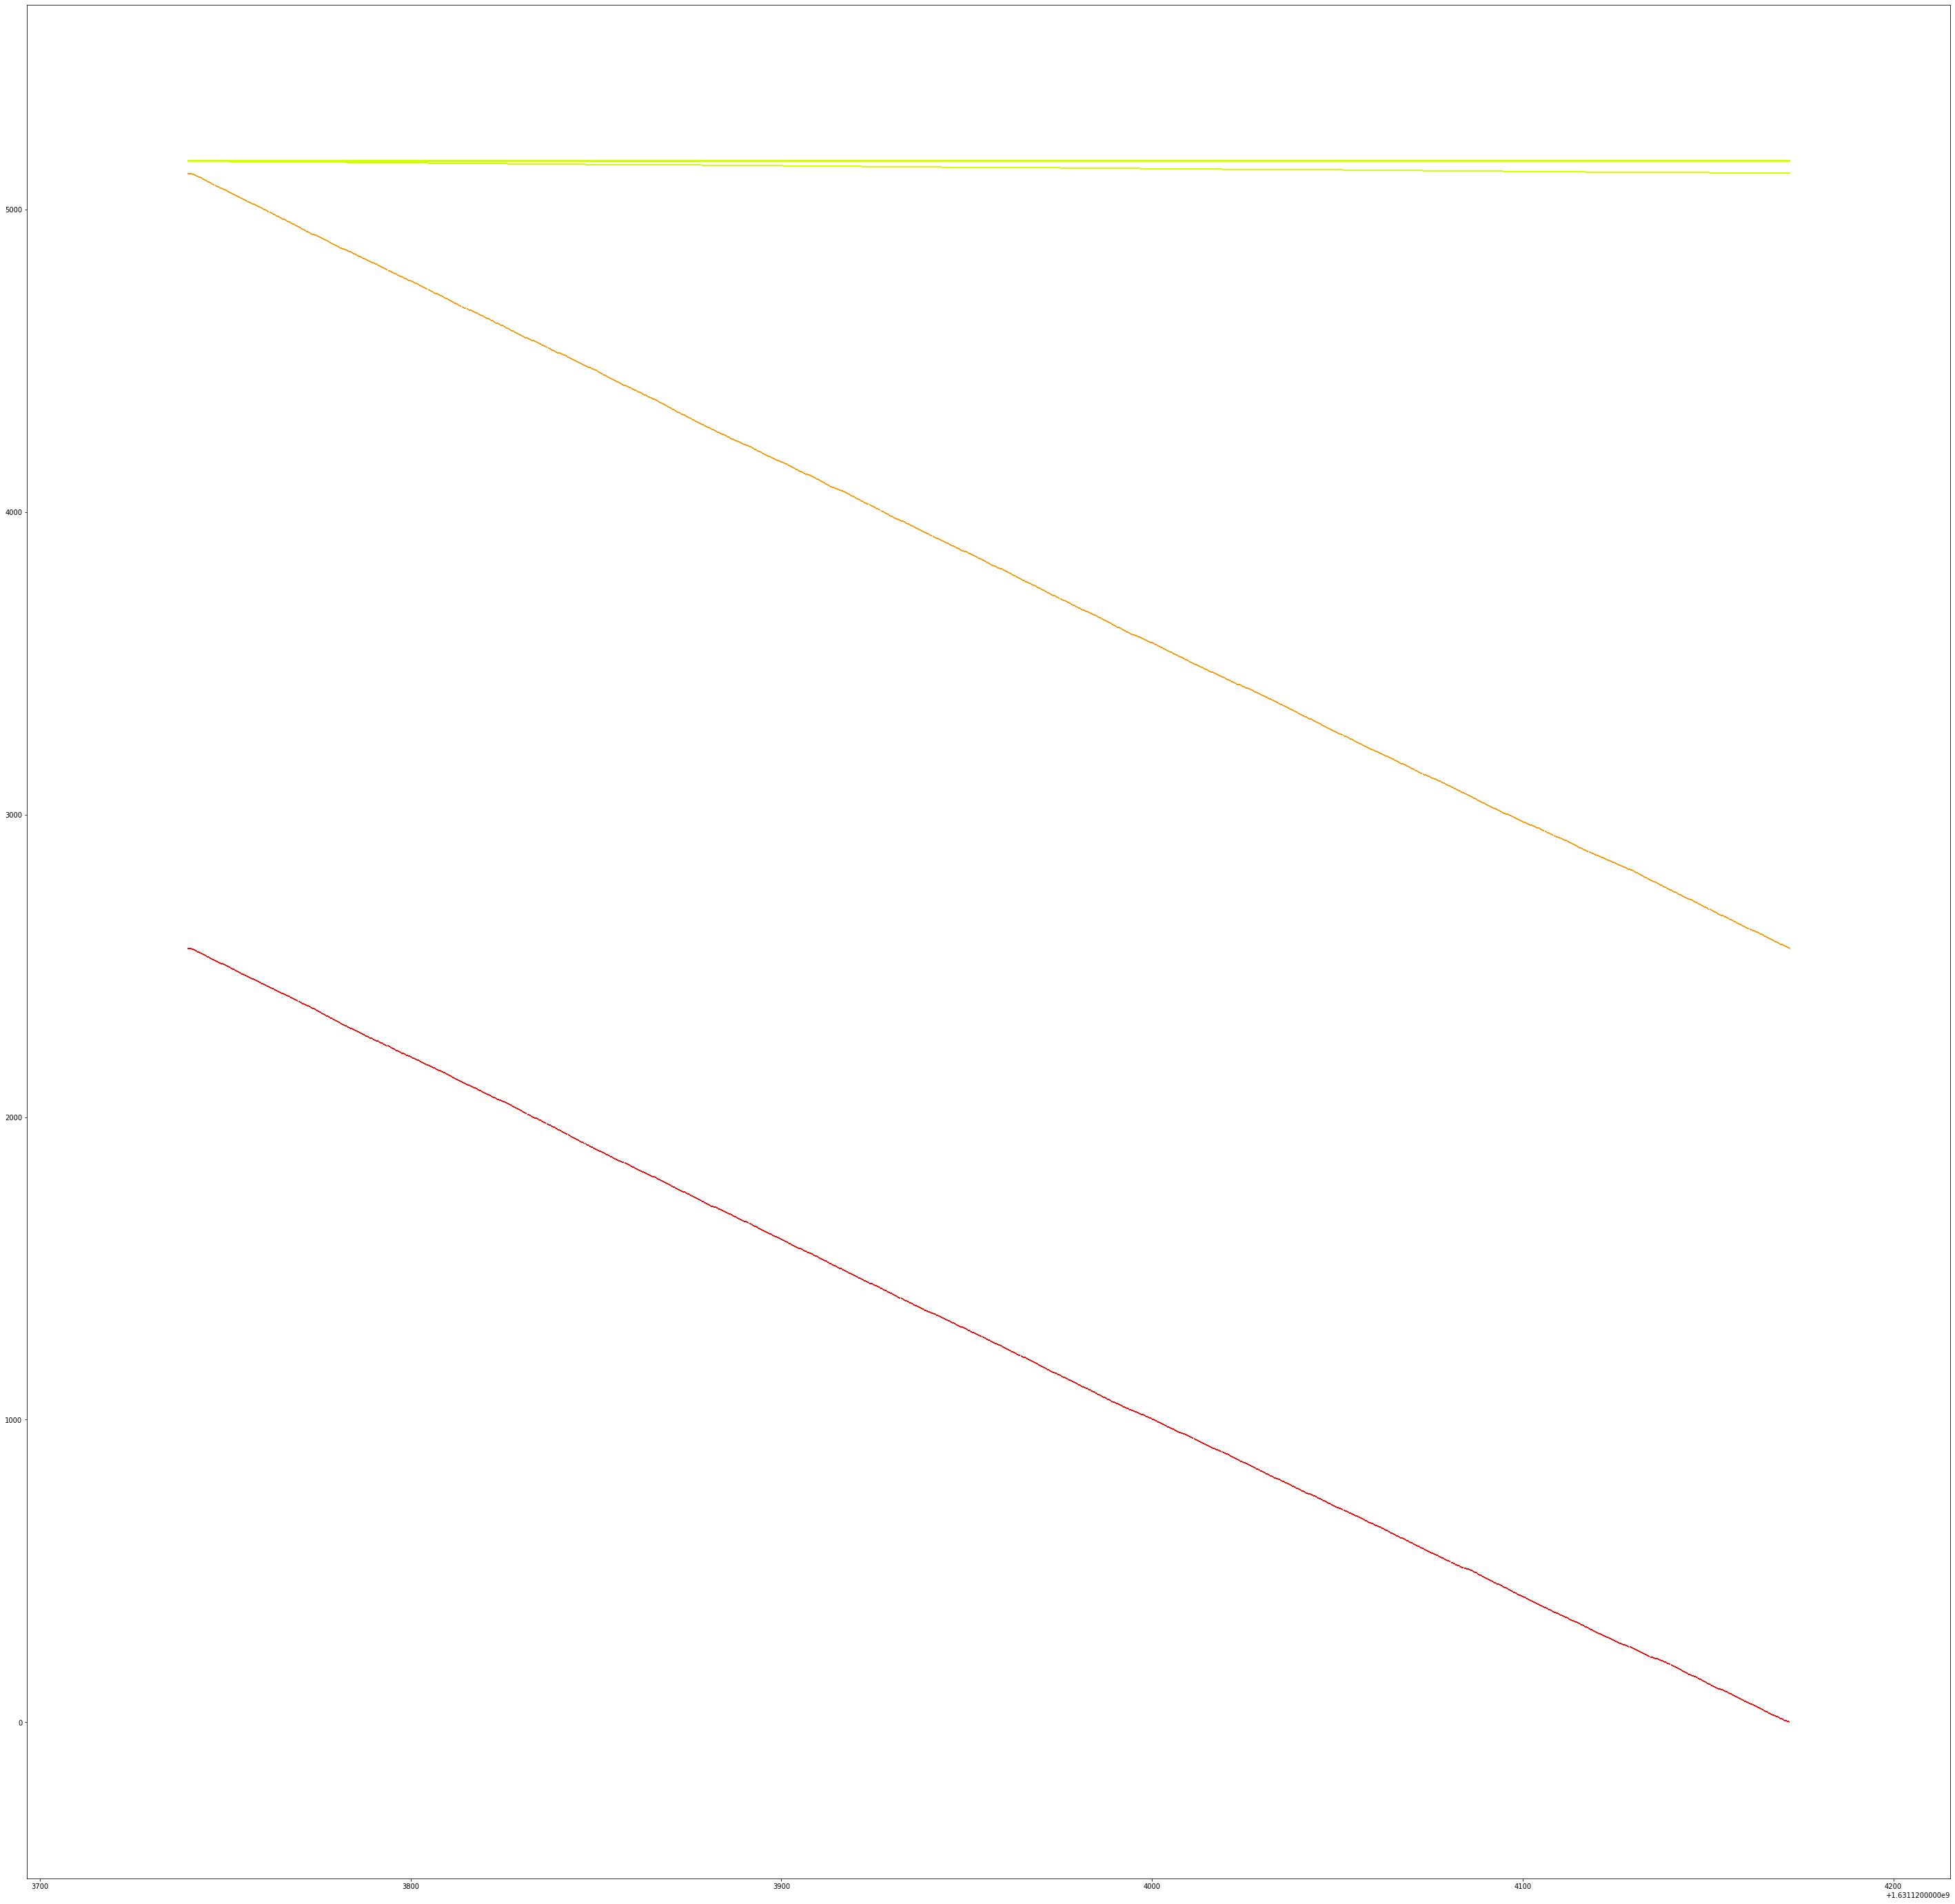

In [29]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==2]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

total_elapsed=0:00:07.500556
total_bytes=692.6 MB
overall rate 92.3 MB/s
overall rate 738.7 MBit/s
                 time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
1.403581e+14          1.631451e+09     1.631451e+09              5.945332   
1.403581e+14          1.631451e+09     1.631451e+09              6.047638   
1.403581e+14          1.631451e+09     1.631451e+09              6.162004   
1.403582e+14          1.631451e+09     1.631451e+09              5.991753   
1.403582e+14          1.631451e+09     1.631451e+09              6.028947   
1.403583e+14          1.631451e+09     1.631451e+09              5.986028   
1.403583e+14          1.631451e+09     1.631451e+09              5.921562   
1.403584e+14          1.631451e+09     1.631451e+09              6.006002   

                 elapsed_thread  elapsed_processing  
threading_ident                                      
1.403581e+14          

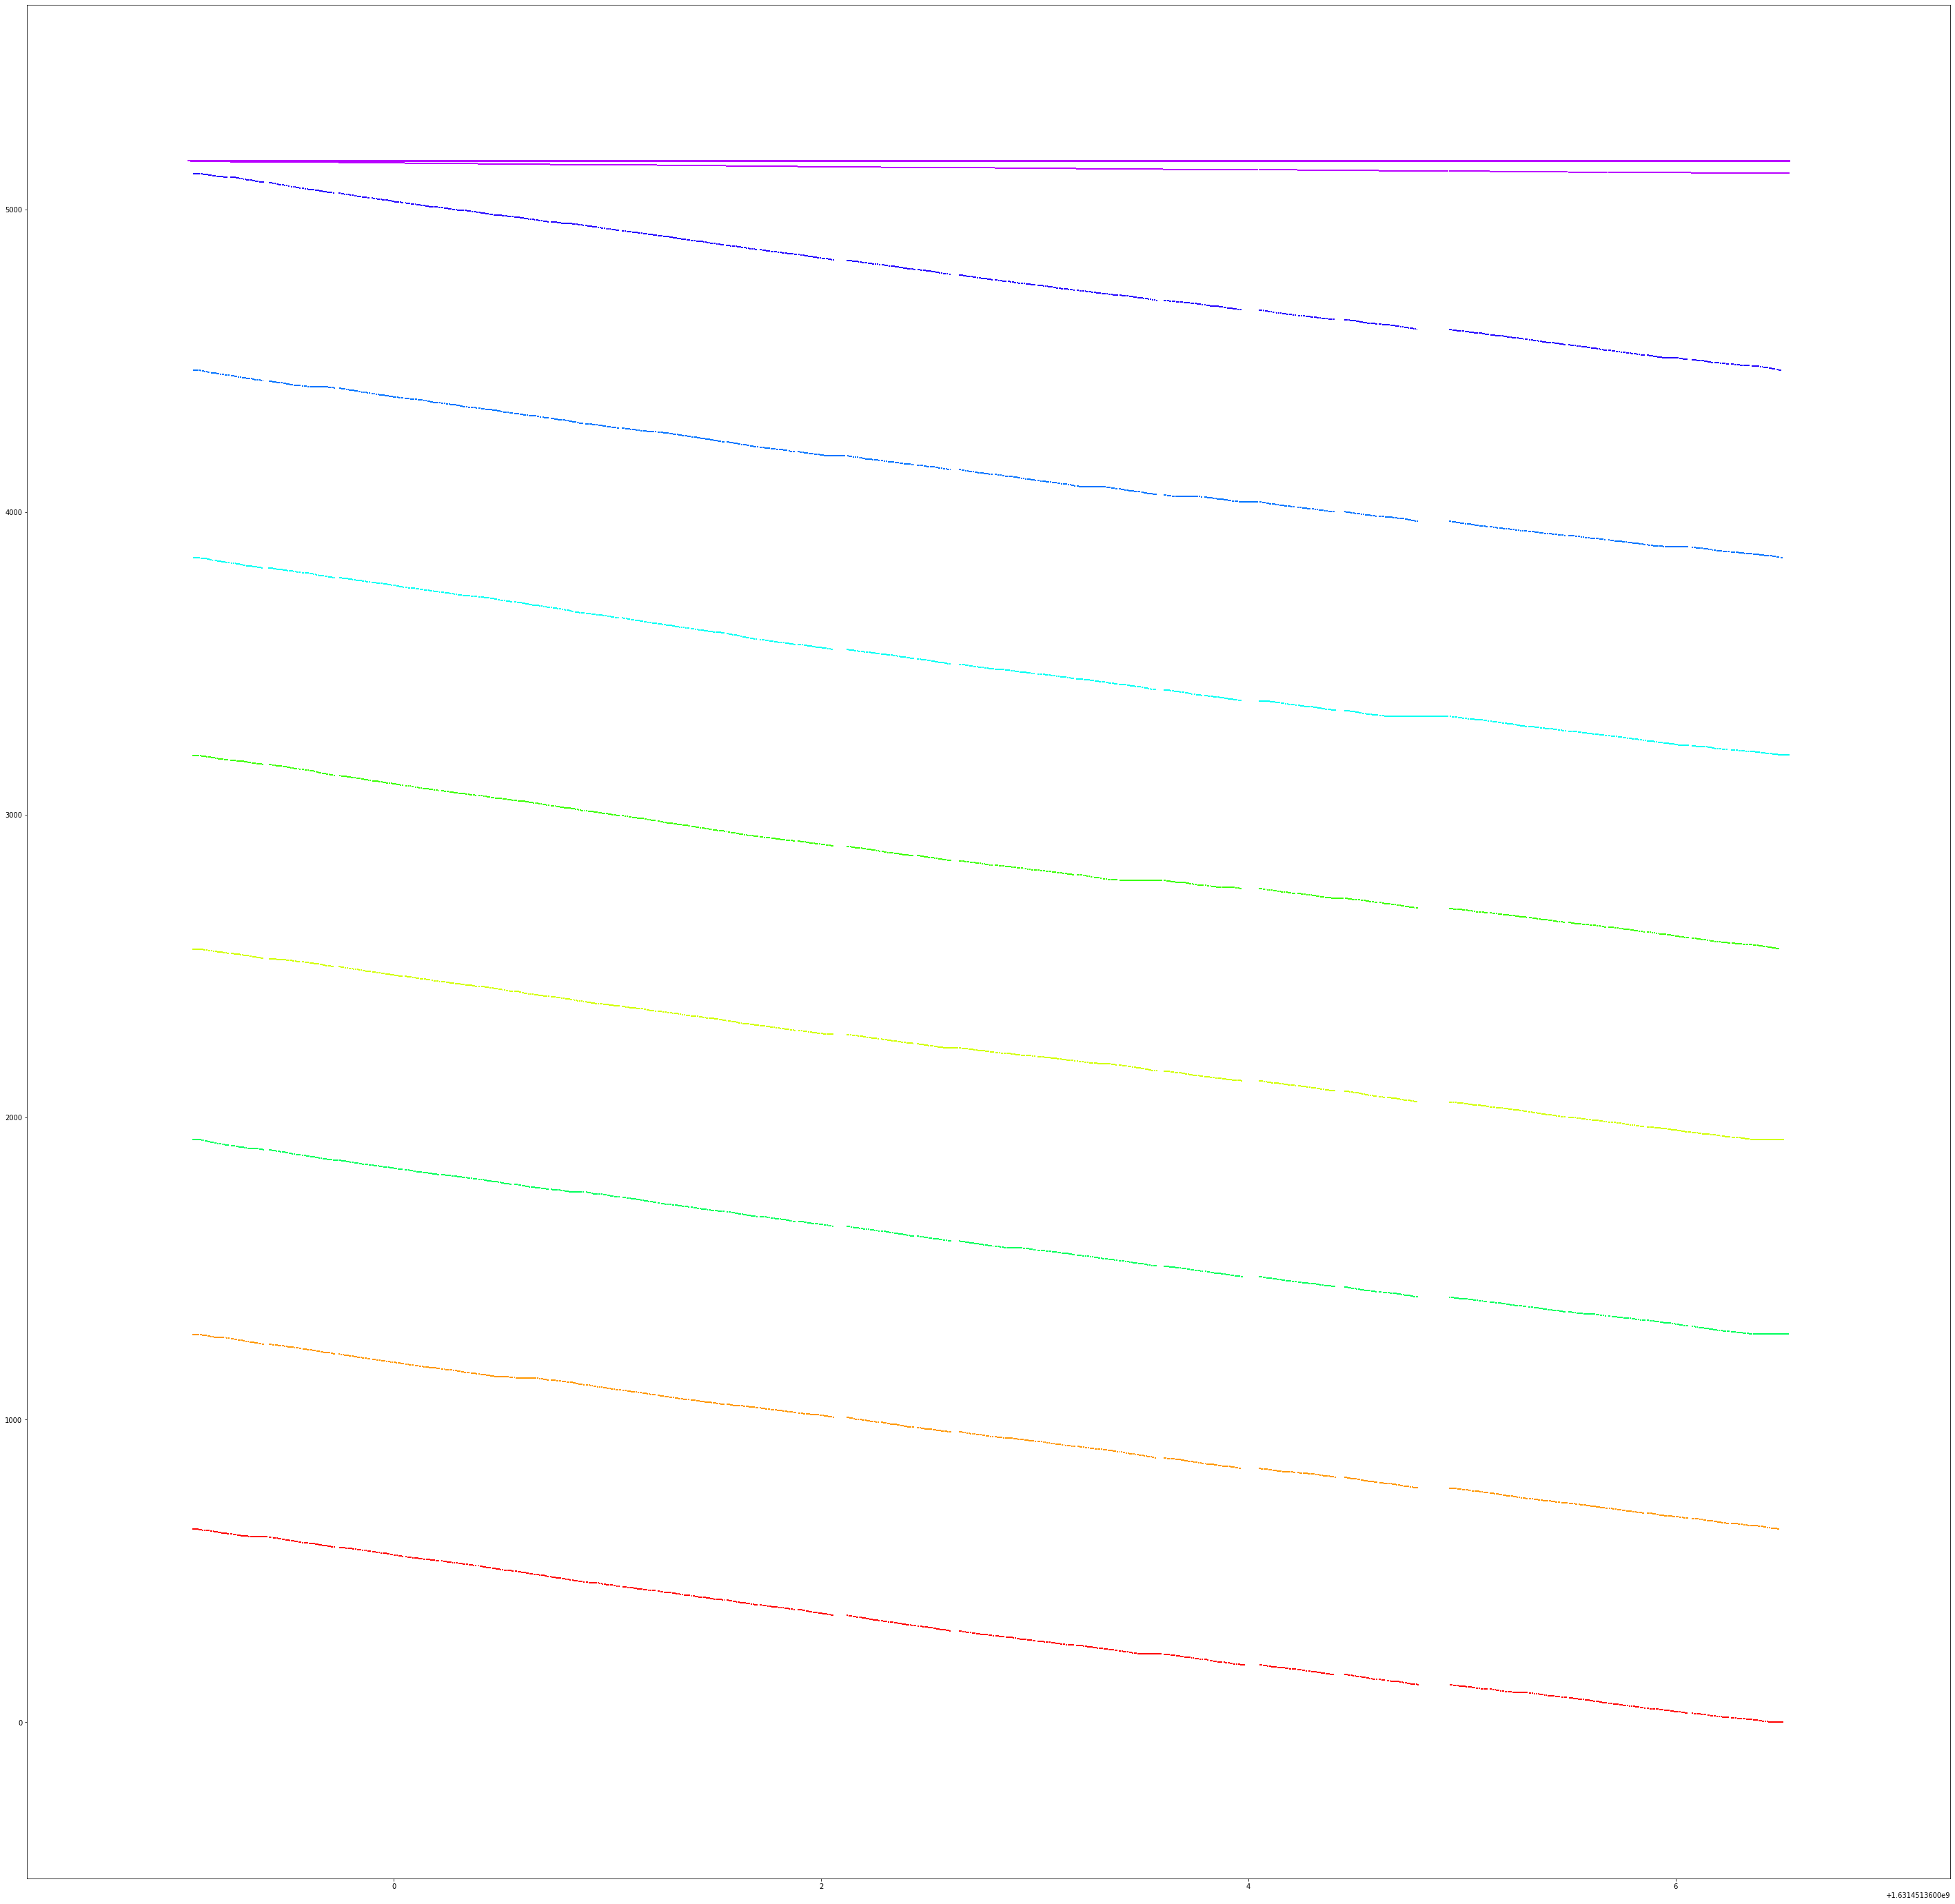

In [52]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==8]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

total_elapsed=0:01:18.154947
total_bytes=697.8 MB
overall rate 8.9 MB/s
overall rate 71.4 MBit/s


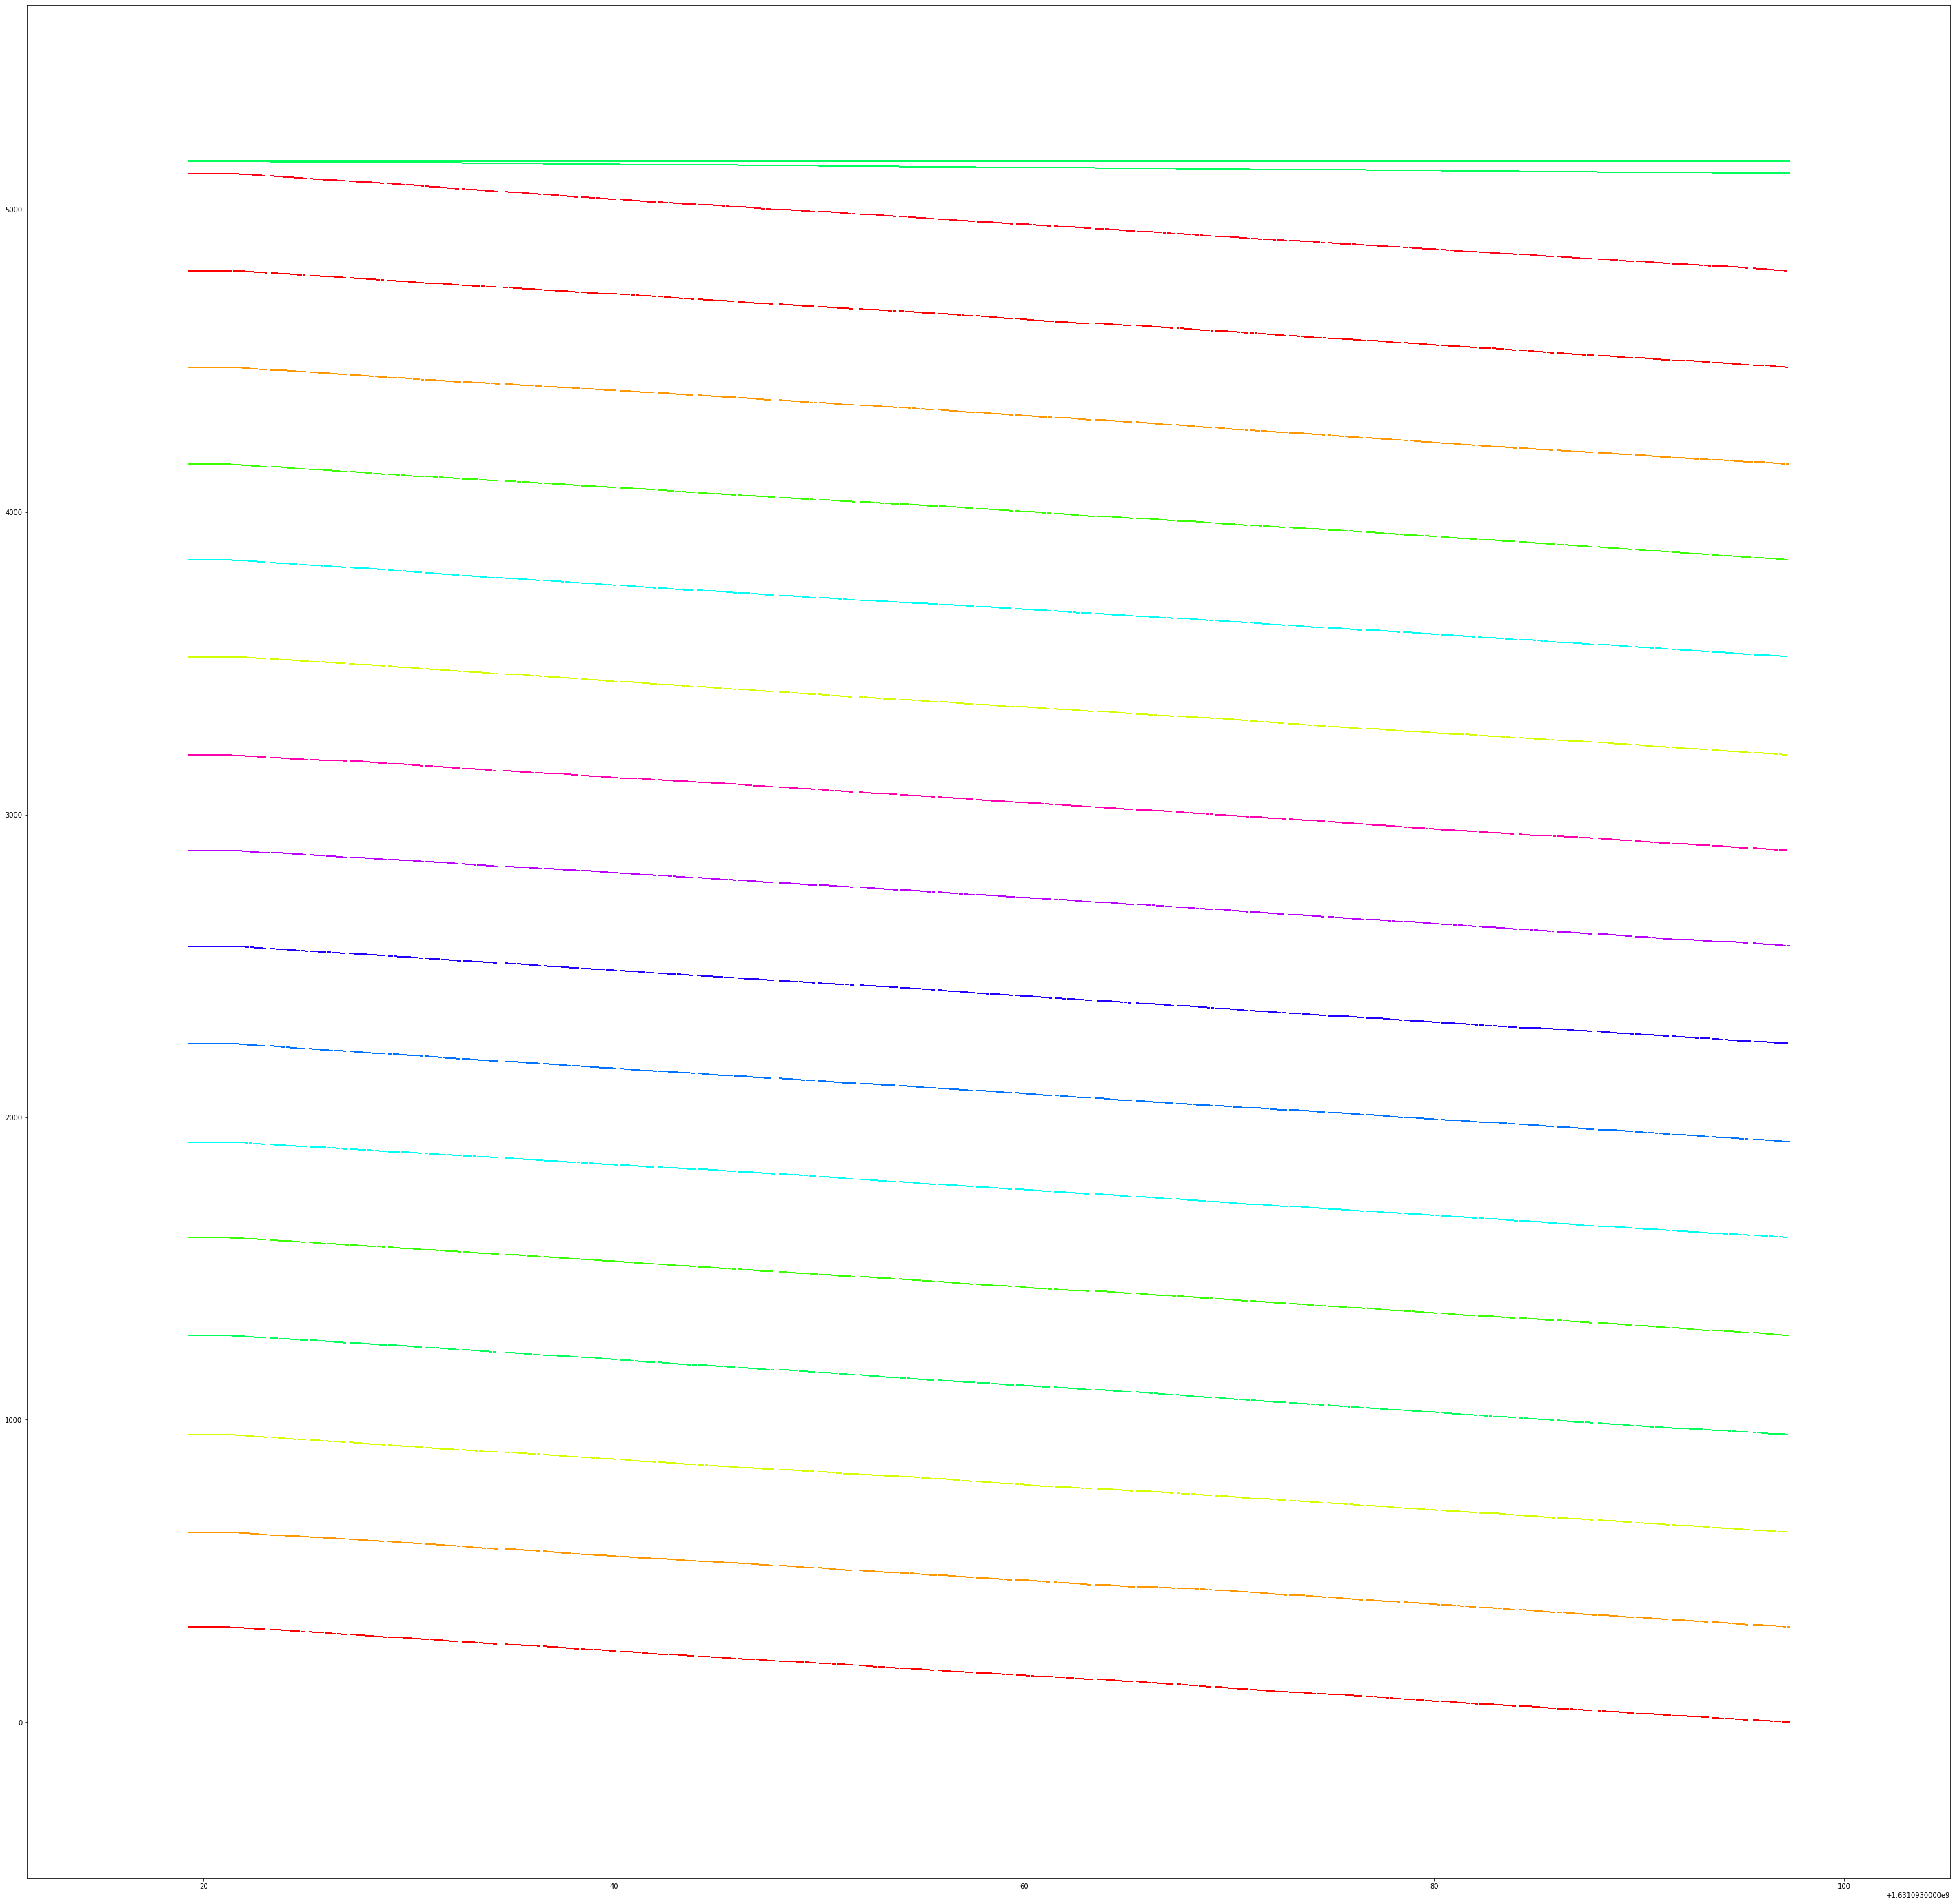

In [31]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==16]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

As we have num_workers=0, batches are processed strictly sequentially. In the following data, we see one hanging request to block the processing of the next batch:

total_elapsed=0:00:09.465603
total_bytes=679.9 MB
overall rate 71.8 MB/s
overall rate 574.6 MBit/s


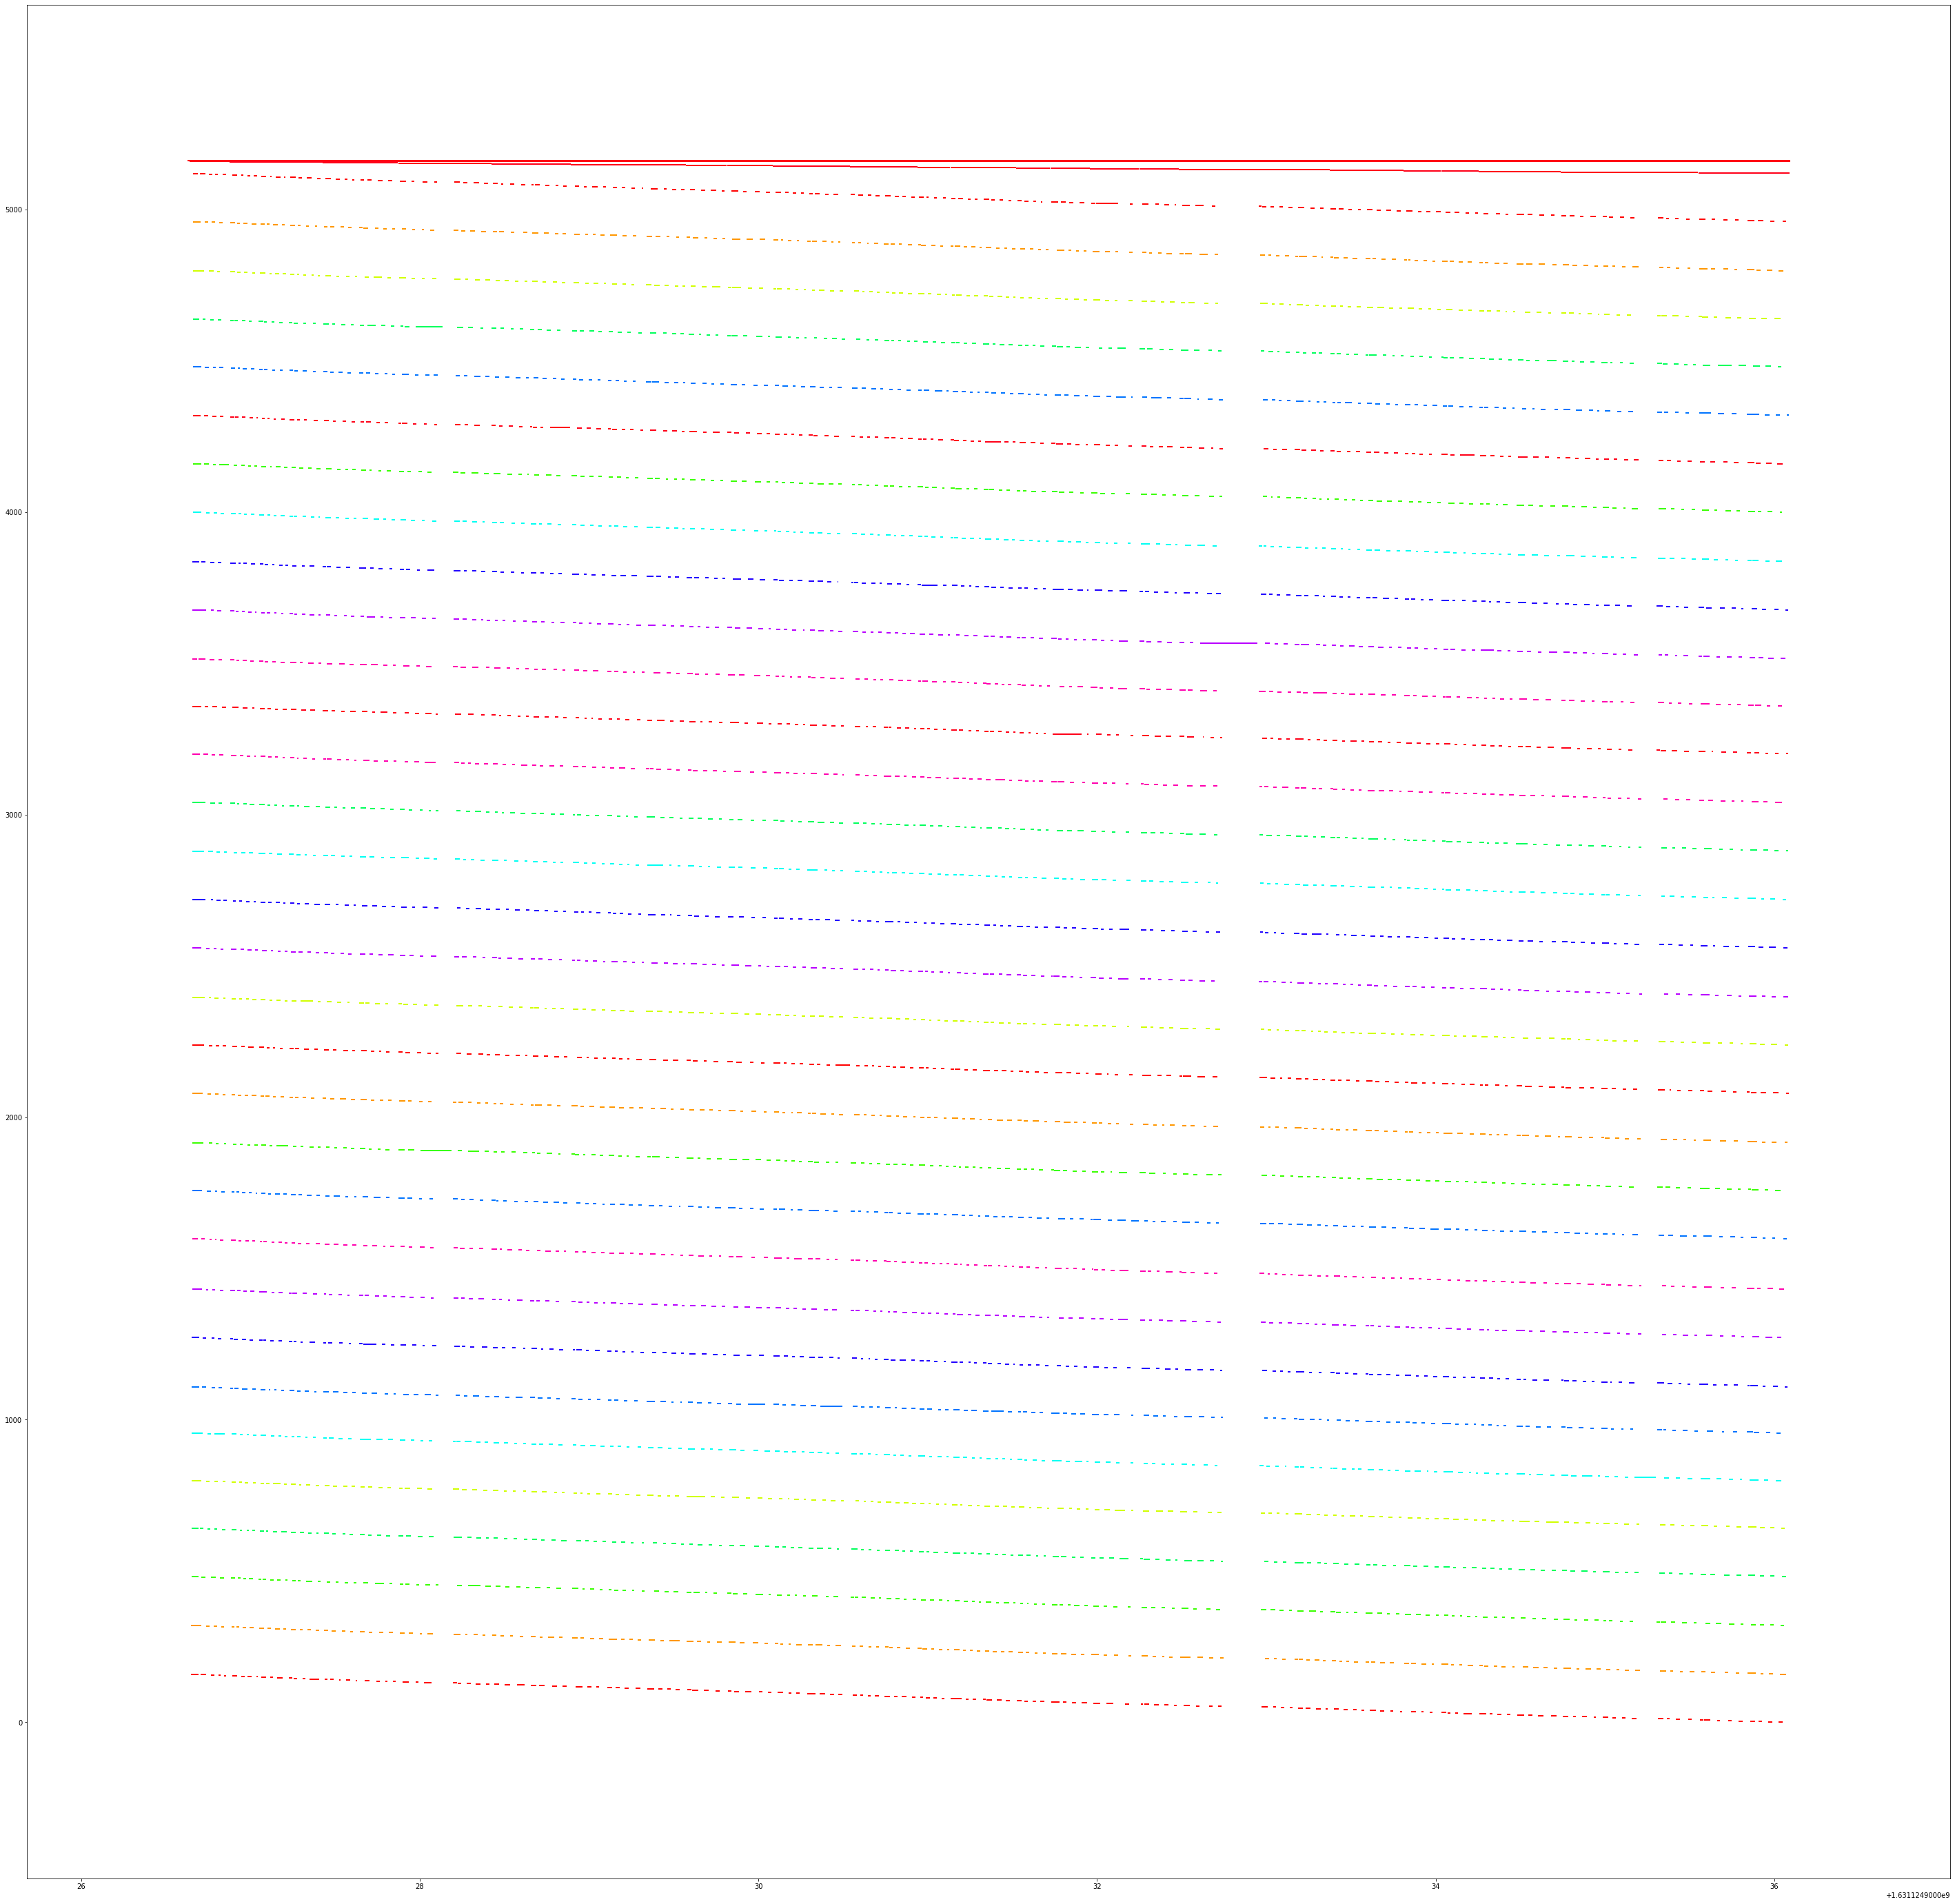

In [32]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==32]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

Let's inspect the long horizontal lines at the beginning. It looks as if the very first item takes very long to get from s3

In [33]:
df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run]["threading_ident"].drop_duplicates()

0      1.396668e+14
1      1.396642e+14
2      1.396673e+14
3      1.396675e+14
4      1.396676e+14
5      1.396677e+14
6      1.396674e+14
7      1.396667e+14
8      1.396674e+14
9      1.396643e+14
10     1.396669e+14
11     1.396661e+14
12     1.396643e+14
13     1.396666e+14
14     1.396643e+14
15     1.396668e+14
16     1.396667e+14
17     1.396670e+14
18     1.396675e+14
19     1.396677e+14
20     1.396673e+14
21     1.396672e+14
22     1.396675e+14
23     1.396672e+14
24     1.396672e+14
26     1.396671e+14
27     1.396643e+14
28     1.396669e+14
29     1.396671e+14
34     1.396669e+14
35     1.396670e+14
38     1.396667e+14
128    1.396712e+14
Name: threading_ident, dtype: float64

<AxesSubplot:xlabel='time_end', ylabel='elapsed'>

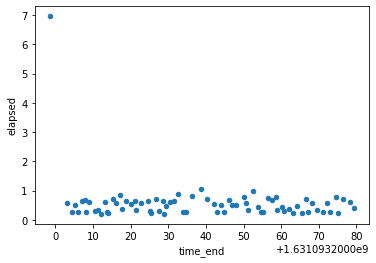

In [34]:
df_dataloader_zeroworkers[df_dataloader_zeroworkers["threading_ident"]==140353550149376].plot.scatter(x="time_end", y="elapsed")

total_elapsed=0:00:11.099556
total_bytes=686.8 MB
overall rate 61.9 MB/s
overall rate 495.0 MBit/s


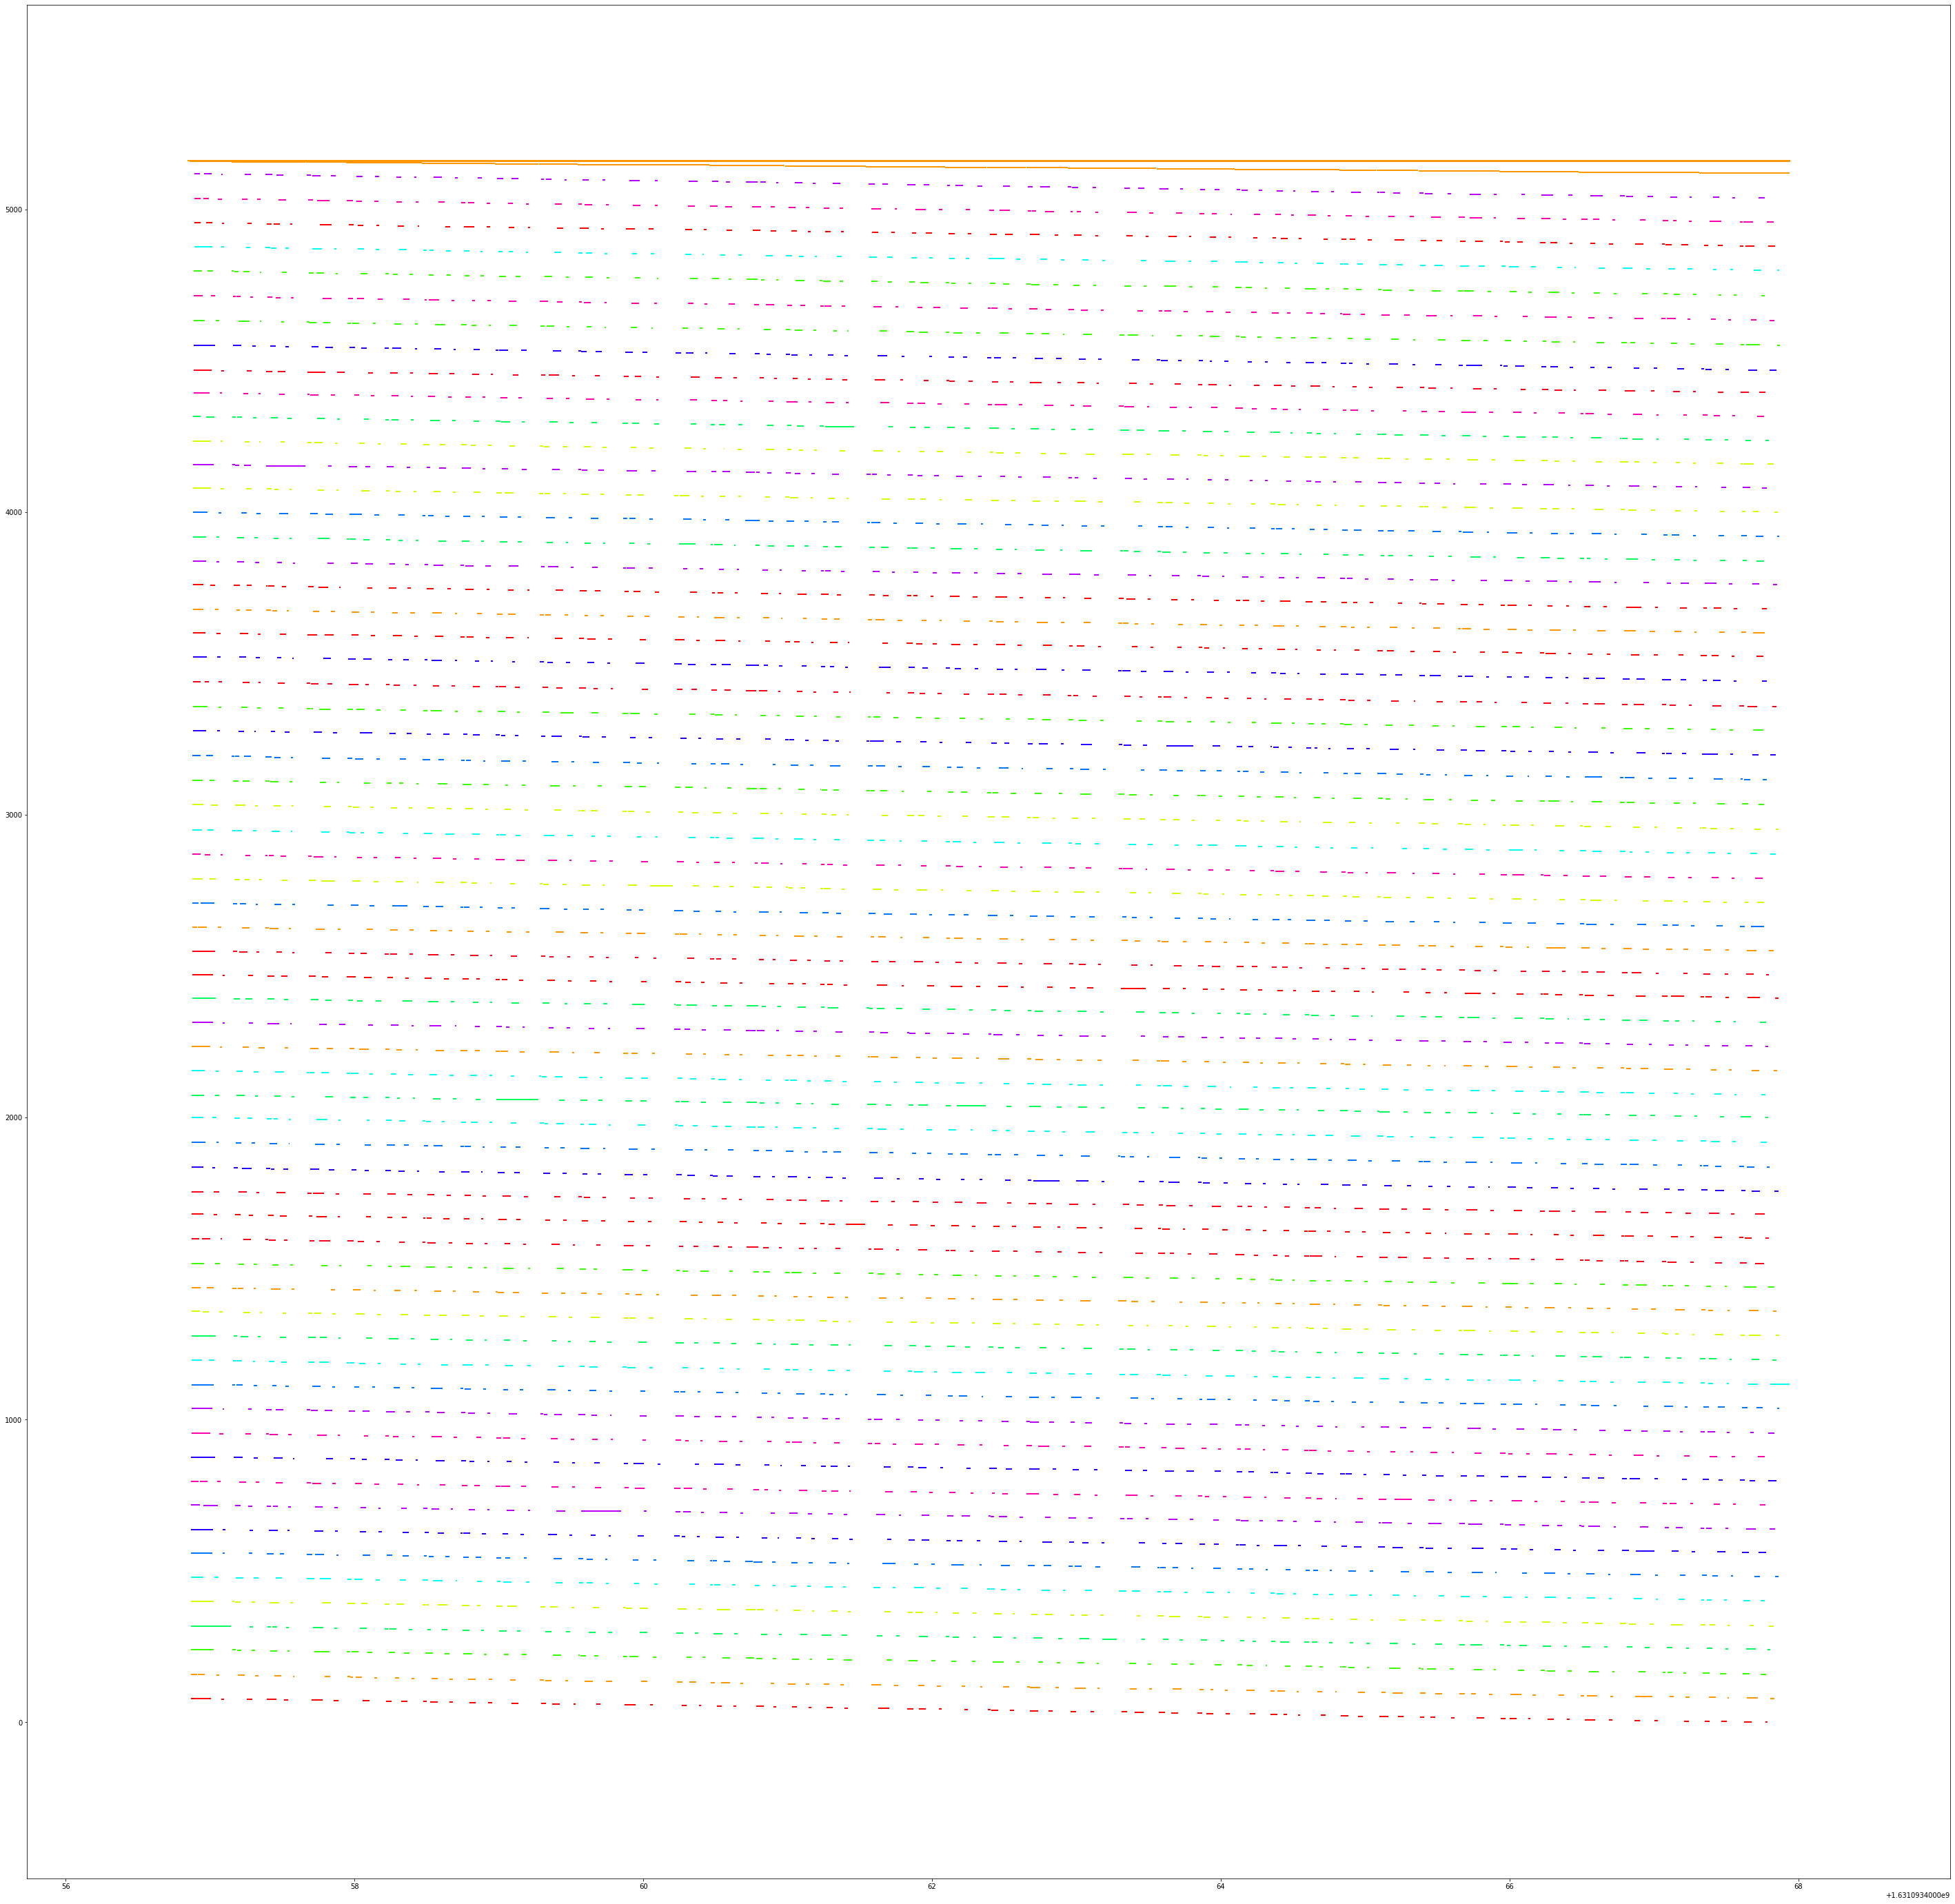

In [35]:
run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==64]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers[df_dataloader_zeroworkers["run"]==run])

## Visualizing pipelineing with multiple workers

In [36]:
output_base_folder_pipelining = Path("/iarai/work/logs/storage_benchmarking")

In [44]:
display(get_run_stats(df_dataloader[df_dataloader["num_workers"]>0], group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers run                                                                       
s3      16                1           20210908193653_benchmark_dataloader_s3_32_1_16_...          344983522.0   
                                      20210908193935_benchmark_dataloader_s3_32_1_16_...          344214416.0   
                                      20210912f142142_benchmark_dataloader_s3_32_1_16...          351971616.0   
                          2           20210908193727_benchmark_dataloader_s3_32_2_16_...          357957292.0   
                                      20210908194003_benchmark_dataloader_s3_32_2_16_...          357099164.0   
                                      20210912f142216_benchmark_dataloader_s3_32_2_16...          344462404.0   
                          4           20210908194019_benchmark_dataloader_s3_32_4_16_...          391260492.0   
                                      20210912f142232_benchmark_dataloader_s3_32_4_16...          377243570.0   
                          8           20210908193743_benchmark_dataloader_s3_32_8_16_...          415836114.0   
                                      20210908194030_benchmark_dataloader_s3_32_8_16_...          407672610.0   
                                      20210912f142243_benchmark_dataloader_s3_32_8_16...          412089384.0   
                          16          20210908193753_benchmark_dataloader_s3_32_16_16...                  0.0   
                                      20210908194040_benchmark_dataloader_s3_32_16_16...          568175144.0   
                                      20210912f142253_benchmark_dataloader_s3_32_16_1...          560275558.0   
                          32          20210908194053_benchmark_dataloader_s3_32_32_16...          784809504.0   
                                      20210912f142305_benchmark_dataloader_s3_32_32_1...          808168906.0   
        32                1           20210908193209_benchmark_dataloader_s3_32_1_32_...           44856182.0   
scratch 16                1           20210908194112_benchmark_dataloader_scratch_32_...          346752022.0   
                                      20210912f142324_benchmark_dataloader_scratch_32...          344389078.0   
                          2           20210908194115_benchmark_dataloader_scratch_32_...          367363314.0   
                                      20210912f142327_benchmark_dataloader_scratch_32...          376863412.0   
                          4           20210908194117_benchmark_dataloader_scratch_32_...          375095300.0   
                                      20210912f142330_benchmark_dataloader_scratch_32...          399580388.0   
                          8           20210908194118_benchmark_dataloader_scratch_32_...          472563198.0   
                                      20210912f142331_benchmark_dataloader_scratch_32...          453844378.0   
                          16          20210908194120_benchmark_dataloader_scratch_32_...          505032926.0   
                                      20210912f142333_benchmark_dataloader_scratch_32...          528841816.0   
                          32          20210908194121_benchmark_dataloader_scratch_32_...          794487866.0   
                                      20210912f142334_benchmark_dataloader_scratch_32...          680504220.0   

                                                                                            time_start  \
dataset num_fetch_workers num_workers run                                                                
s3      16                1           20210908193653_benchmark_dataloader_s3_32_1_16_...  1.631123e+09   
                                      20210908193935_benchmark_dataloader_s3_32_1_16_...  1.631123e+09   
                                      20210912f142142_benchmark_dataloader_s3_32_1_16...  1.631449e+09   
                          2           20210908193727_ben

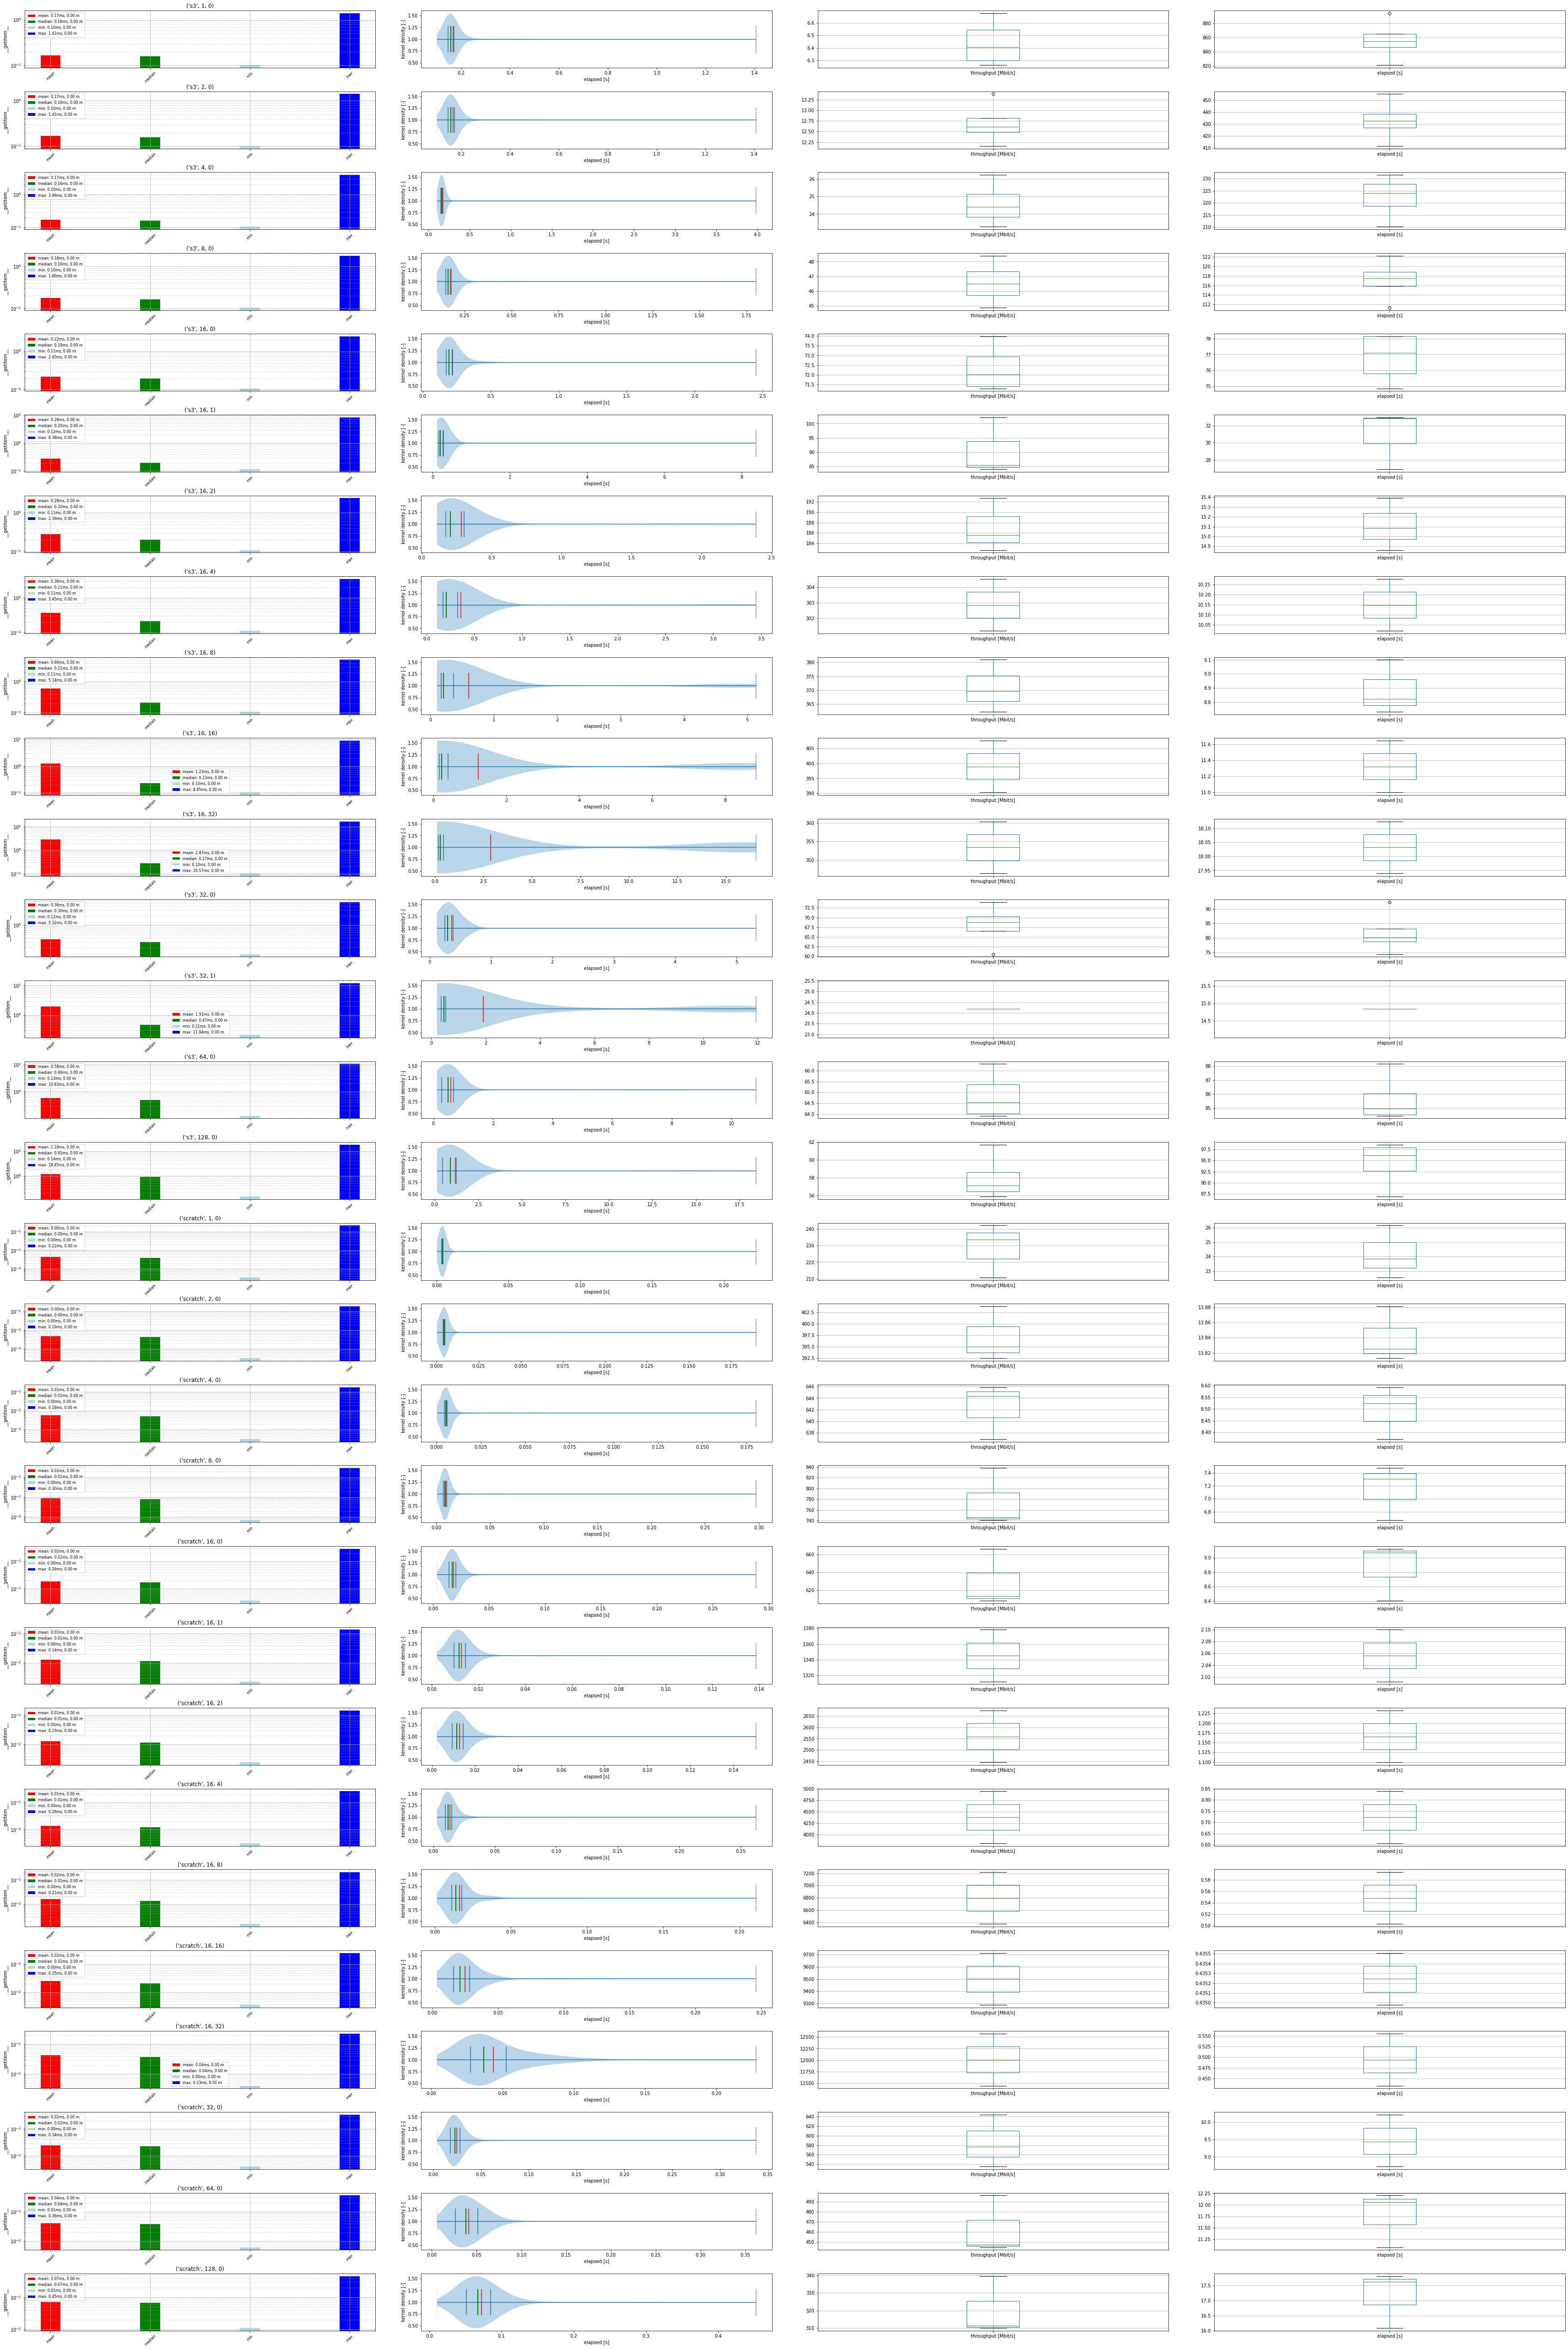

In [38]:
plot_all(df_dataloader, "__getitem__", plot_max=True, log_scale=True, figsize = (50, 80), group_by=group_by_dataloader)

In [ ]:
# TODO heatmap num_fetch_workers/num_workers -> throughput.

trace_name  trace_level function_name   elapsed  \
0                      (5)-get_item          5.0   __getitem__  0.030244   
1                      (5)-get_item          5.0   __getitem__  0.033100   
2                      (5)-get_item          5.0   __getitem__  0.036252   
3                      (5)-get_item          5.0   __getitem__  0.031816   
4                      (5)-get_item          5.0   __getitem__  0.033487   
..                              ...          ...           ...       ...   
227                    (5)-get_item          5.0   __getitem__  0.009122   
228                    (5)-get_item          5.0   __getitem__  0.011218   
229                    (5)-get_item          5.0   __getitem__  0.011400   
230  (4)-threadedmapdataset-fetcher          4.0         fetch  0.049436   
231                 (3)-worker_loop          3.0  _worker_loop  0.542068   

       time_start      time_end  process_time  process_time_start  \
0    1.631449e+09  1.631449e+09      0.105422            0.765798   
1    1.631449e+09  1.631449e+09      0.125716            0.767334   
2    1.631449e+09  1.631449e+09      0.133786            0.765239   
3    1.631449e+09  1.631449e+09      0.129611            0.771419   
4    1.631449e+09  1.631449e+09      0.136592            0.772405   
..            ...           ...           ...                 ...   
227  1.631449e+09  1.631449e+09      0.047630            2.768028   
228  1.631449e+09  1.631449e+09      0.064515            2.752122   
229  1.631449e+09  1.631449e+09      0.061137            2.757751   
230  1.631449e+09  1.631449e+09      0.250433            2.569151   
231  1.631449e+09  1.631449e+09      2.818436            0.001573   

     process_time_end      pid  ...  repeat  num_batches shuffle system  \
0            0.871220  51108.0  ...       1           40    True  Linux   
1            0.893050  51108.0  ...       1           40    True  Linux   
2            0.899025  51108.0  ...       1           40    True  Linux   
3            0.901031  51108.0  ...       1           40    True  Linux   
4            0.908997  51108.0  ...       1           40    True  Linux   
..                ...      ...  ...     ...          ...     ...    ...   
227          2.815658  51075.0  ...       1           40    True  Linux   
228          2.816638  51075.0  ...       1           40    True  Linux   
229          2.818887  51075.0  ...       1           40    True  Linux   
230          2.819583  51075.0  ...       1           40    True  Linux   
231          2.820010  51075.0  ...       1           40    True  Linux   

         node          release                                version  \
0    tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
1    tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
2    tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
3    tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
4    tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
..        ...              ...                                    ...   
227  tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
228  tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
229  tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
230  tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   
231  tu-fat-5  4.19.0-17-amd64  #1 SMP Debian 4.19.194-1 (2021-06-10)   

     machine                                        source_file  \
0     x86_64  /Users/che/iarai/work/logs/storage_benchmarkin...   
1     x86_64  /Users/che/iarai/work/logs/storage_benchmarkin...   
2     x86_64  /Users/che/iarai/work/logs/storage_benchmarkin...   
3     x86_64  /Users/che/iarai/work/logs/storage_benchmarkin...   
4     x86_64  /Users/che/iarai/work/logs/storage_benchmarkin...   
..       ...                                                ...   
227   x86_64  /Users/che/iarai/work/

total_elapsed=0:00:00.660170
total_bytes=453.8 MB
overall rate 687.5 MB/s
overall rate 5.5 GBit/s


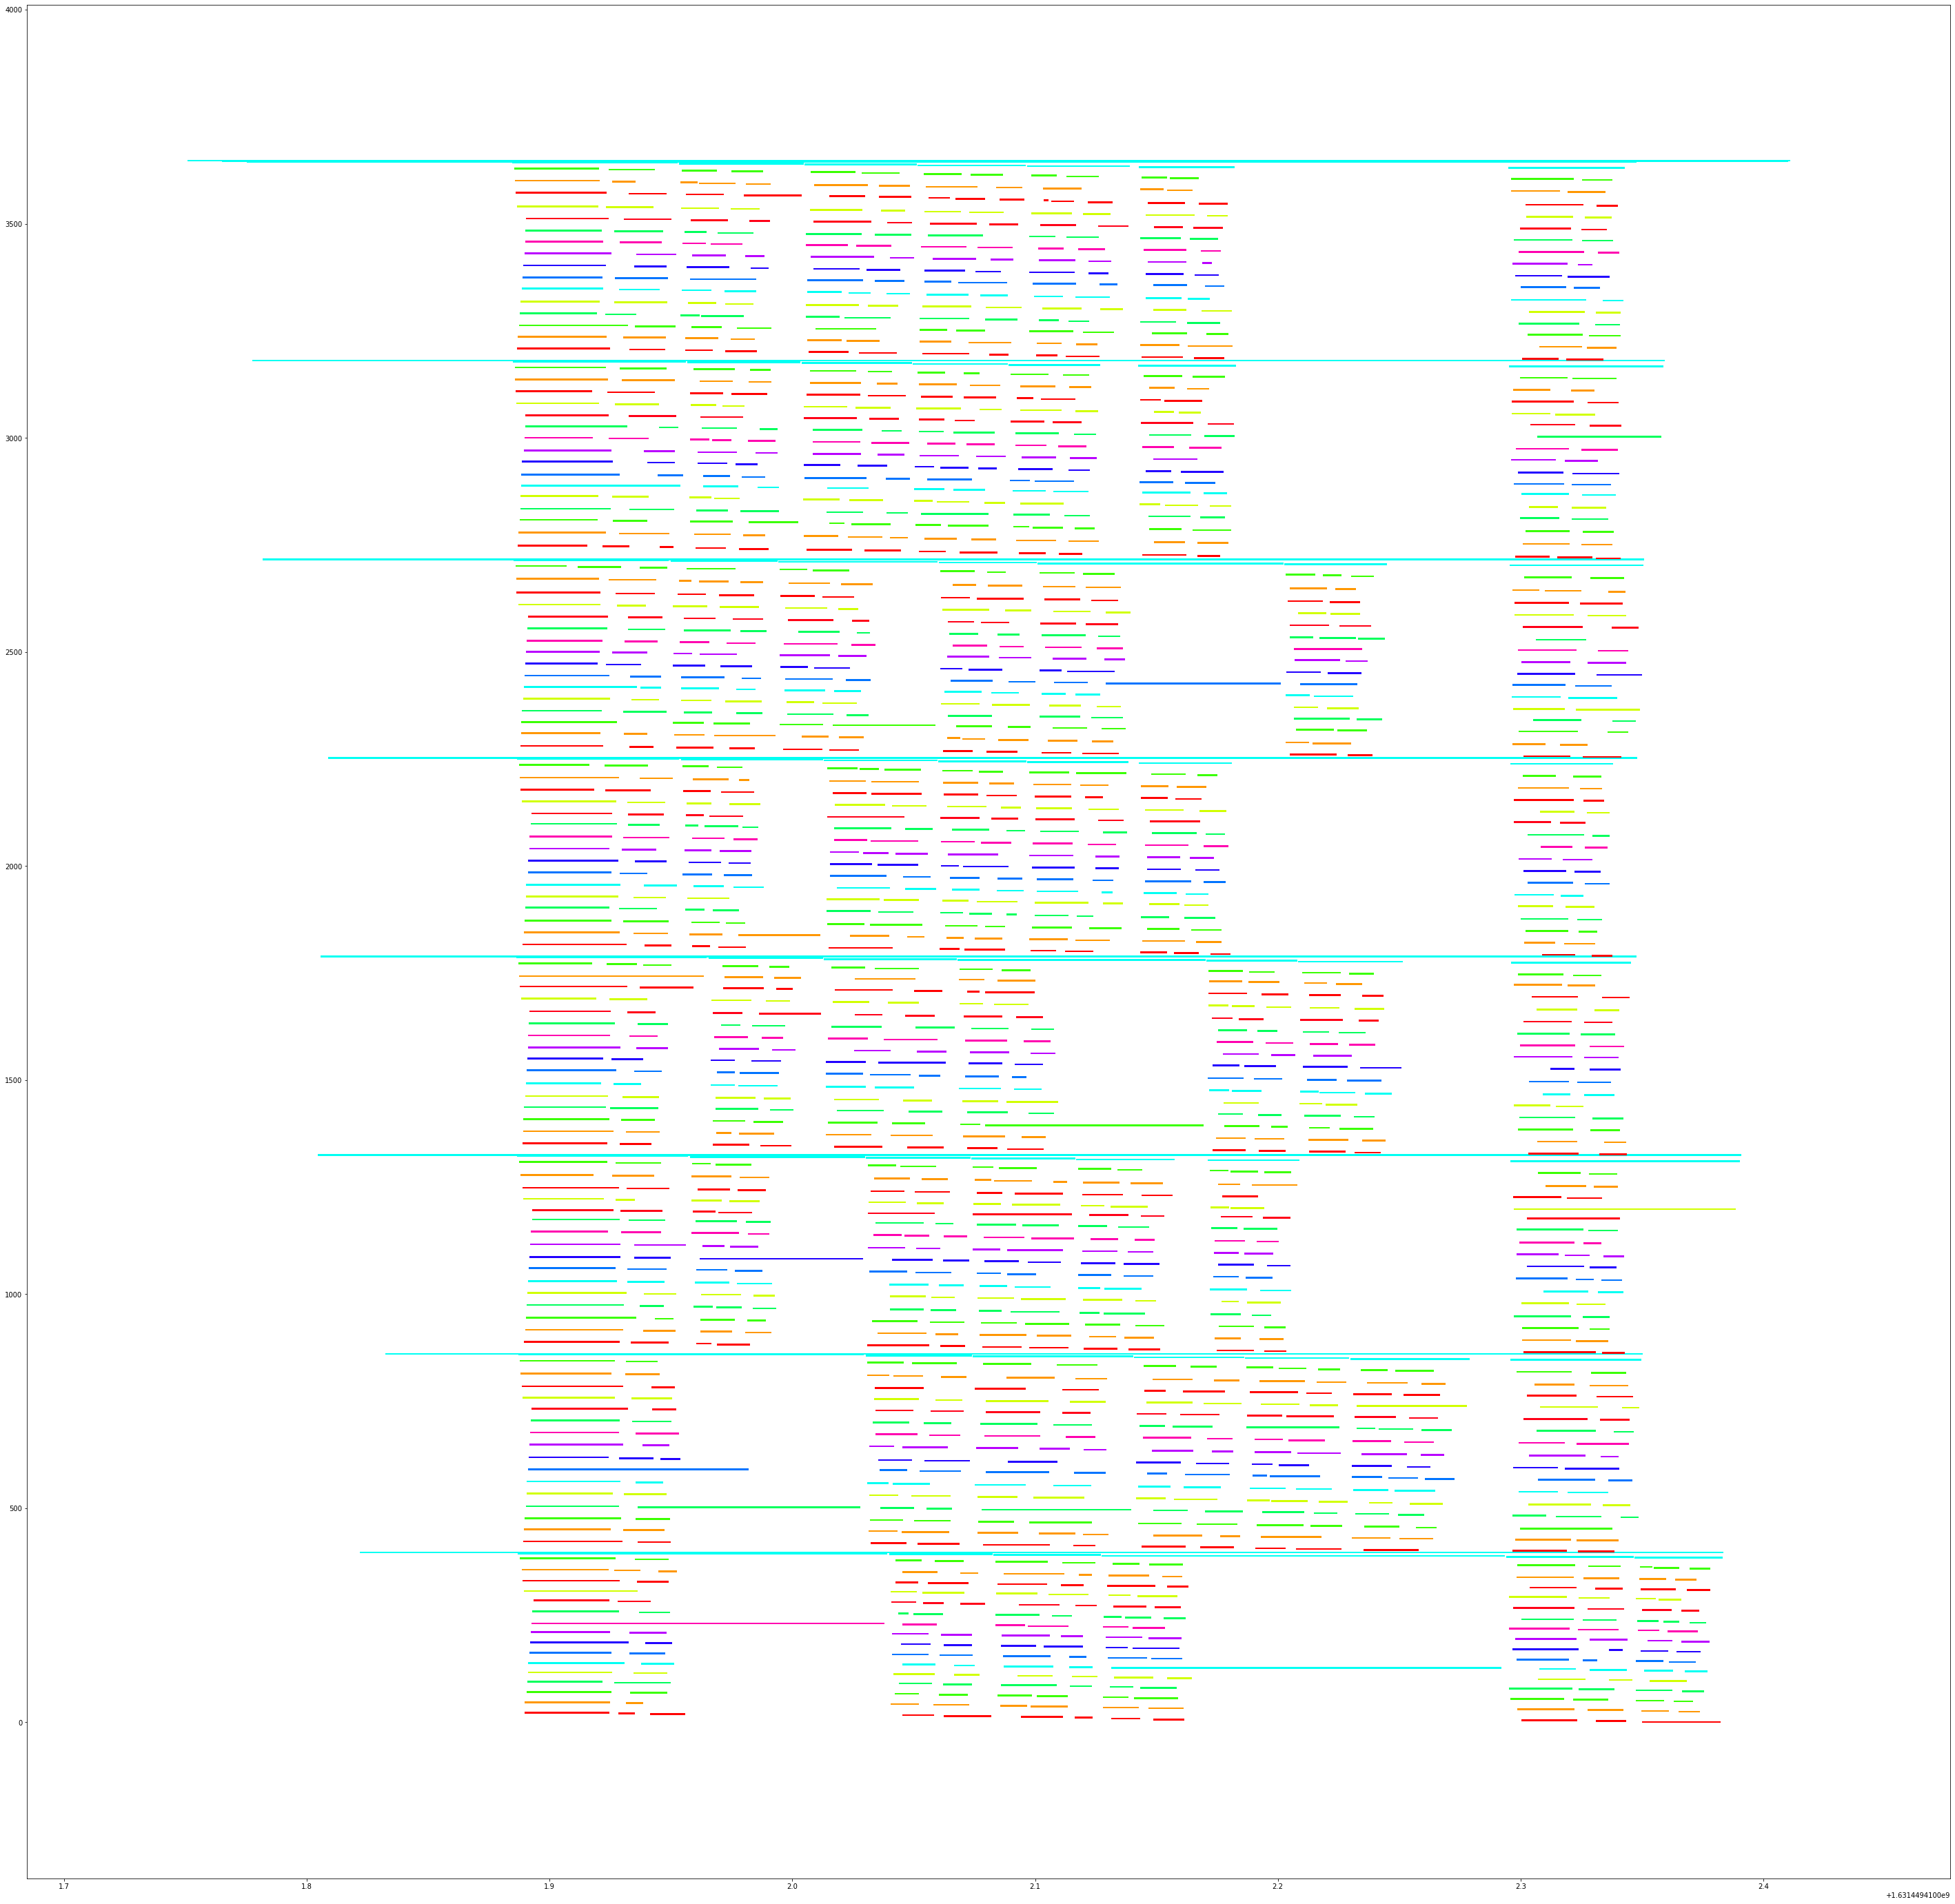

In [47]:

#run = df_dataloader_zeroworkers[df_dataloader_zeroworkers["num_fetch_workers"]==64]["run"].iloc[0]
run = "20210912f142331_benchmark_dataloader_scratch_32_8_16_sync"
display(df_dataloader[df_dataloader["run"]==run])
plot_events_timeline(df_dataloader[df_dataloader["run"]==run])

In [88]:
throughputs = get_throughputs(df_dataloader, group_by=group_by_dataloader)
display(throughputs)

total_elpased_time [s]  \
dataset num_fetch_workers num_workers                           
s3      1                 0                       3425.830479   
        2                 0                       1732.477158   
        4                 0                        890.071905   
        8                 0                        468.761637   
        16                0                        307.317924   
                          1                         93.038141   
                          2                         45.607570   
                          4                         20.544844   
                          8                         27.146291   
                          16                        30.765713   
                          32                        36.870475   
        32                0                        327.131761   
                          1                         14.918982   
        64                0                        342.624856   
        128               0                        377.781538   
scratch 1                 0                         73.298536   
        2                 0                         42.470612   
        4                 0                         26.224278   
        8                 0                         22.130958   
        16                0                         27.254946   
                          1                          4.256989   
                          2                          2.514743   
                          4                          1.659545   
                          8                          1.398367   
                          16                         1.361188   
                          32                         1.769235   
        32                0                         29.006739   
        64                0                         36.033928   
        128               0                         52.296429   

                                       downloaded data [MB]  \
dataset num_fetch_workers num_workers                         
s3      1                 0                     2755.061129   
        2                 0                     2745.169614   
        4                 0                     2729.763915   
        8                 0                     2725.595388   
        16                0                     2776.845574   
                          1                     1041.169554   
                          2                     1059.518860   
                          4                      768.504062   
                          8                     1235.598108   
                          16                    1128.450702   
                          32                    1592.978410   
        32                0                     2764.904491   
                          1                       44.856182   
        64                0                     2775.330433   
        128               0                     2730.964748   
scratch 1                 0                     2067.901966   
        2                 0                     2061.051664   
        4                 0                     2046.652394   
        8                 0                     2072.598167   
        16                0                     2088.263515   
                          1                      691.141100   
                          2                      744.226726   
                          4                      774.675688   
                          8                      926.407576   
                          16                    1033.874742   
                          32                    1474.992086   
        32                0                     2065.683155   
        64                0                     2040.180203   
        128               0                     2058.064975   

                                       med. throughput [MBit/s]  \
da

In [89]:
throughputs = throughputs.reset_index()


array([  6.43361928,  12.67627501,  24.53522148,  46.51567318,
        72.28593867,  89.52625625, 185.84965033, 299.24941721,
       364.13021792, 293.43073222, 345.63772718,  67.61567843,
        24.053214  ,  64.80161341,  57.83161907])

In [92]:
display(throughputs)
s3_throughputs = throughputs[throughputs["dataset"]=="s3"]
#throughputs[throughputs["dataset"]=="s3"].to_numpy()

dataset  num_fetch_workers  num_workers  total_elpased_time [s]  \
0        s3                  1            0             3425.830479   
1        s3                  2            0             1732.477158   
2        s3                  4            0              890.071905   
3        s3                  8            0              468.761637   
4        s3                 16            0              307.317924   
5        s3                 16            1               93.038141   
6        s3                 16            2               45.607570   
7        s3                 16            4               20.544844   
8        s3                 16            8               27.146291   
9        s3                 16           16               30.765713   
10       s3                 16           32               36.870475   
11       s3                 32            0              327.131761   
12       s3                 32            1               14.918982   
13       s3                 64            0              342.624856   
14       s3                128            0              377.781538   
15  scratch                  1            0               73.298536   
16  scratch                  2            0               42.470612   
17  scratch                  4            0               26.224278   
18  scratch                  8            0               22.130958   
19  scratch                 16            0               27.254946   
20  scratch                 16            1                4.256989   
21  scratch                 16            2                2.514743   
22  scratch                 16            4                1.659545   
23  scratch                 16            8                1.398367   
24  scratch                 16           16                1.361188   
25  scratch                 16           32                1.769235   
26  scratch                 32            0               29.006739   
27  scratch                 64            0               36.033928   
28  scratch                128            0               52.296429   

    downloaded data [MB]  med. throughput [MBit/s]  avg. throughput [MBit/s]  \
0            2755.061129                  6.406787                  6.437976   
1            2745.169614                 12.610769                 12.691655   
2            2729.763915                 24.397942                 24.574387   
3            2725.595388                 46.480962                 46.557061   
4            2776.845574                 71.994954                 72.305150   
5            1041.169554                 85.110514                 90.274024   
6            1059.518860                184.507229                185.886821   
7             768.504062                299.227941                299.227941   
8            1235.598108                363.035612                364.244937   
9            1128.450702                382.064759                260.364484   
10           1592.978410                345.666637                345.666637   
11           2764.904491                 68.777903                 67.997186   
12             44.856182                 24.053214                 24.053214   
13           2775.330433                 64.530149                 64.809698   
14           2730.964748                 57.105154                 57.939378   
15           2067.901966                221.970146                171.436550   
16           2061.051664                393.003329                297.280864   
17           2046.652394                638.451934                480.108990   
18           2072.598167                740.935027                579.017431   
19           2088.263515                608.741667                470.365103   
20            691.141100               1299.497450               1299.497450   
21            744.226726               2371.408677               2371.408677   
22            774.675688         

<IPython.core.display.Javascript object>


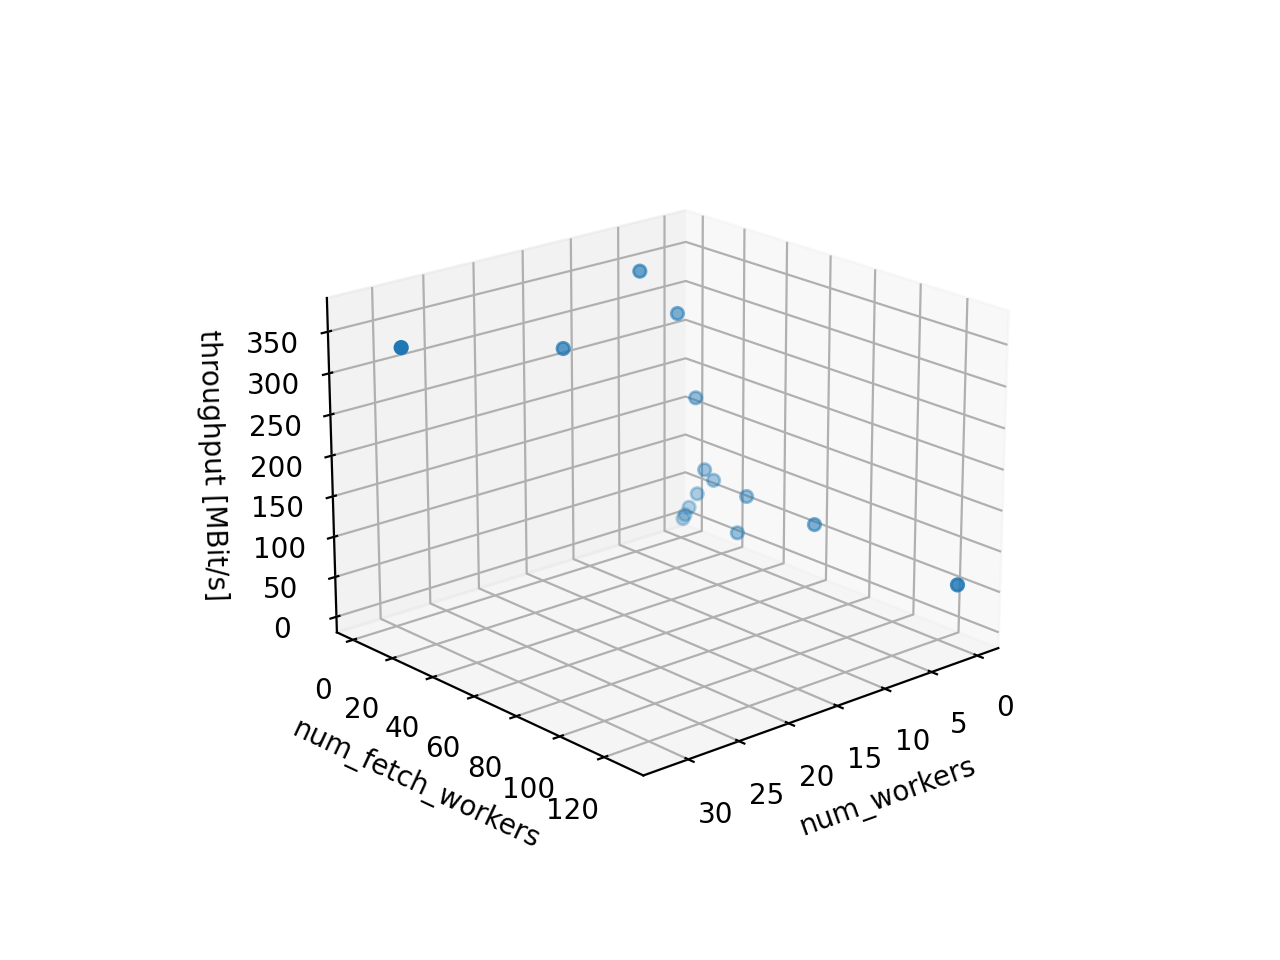

Text(0.5, 0, 'throughput [MBit/s]')

In [98]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(s3_throughputs["num_workers"], s3_throughputs["num_fetch_workers"], s3_throughputs["throughput [MBit/s]"])
ax.set_xlabel('num_workers')
ax.set_ylabel('num_fetch_workers')
ax.set_zlabel('throughput [MBit/s]')